In [1]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt


In [2]:
df_telephone = pd.read_csv('telephone.csv')

In [3]:
df_telephone['date_appel'] = pd.to_datetime(df_telephone['date_appel'])
df_telephone['nombre_entrants_corrige'] = df_telephone['nombre_entrants_corrige'].str.replace(',','.').astype(float)


In [4]:
df_telephone = df_telephone.drop("id",axis=1)

<AxesSubplot:xlabel='date_appel'>

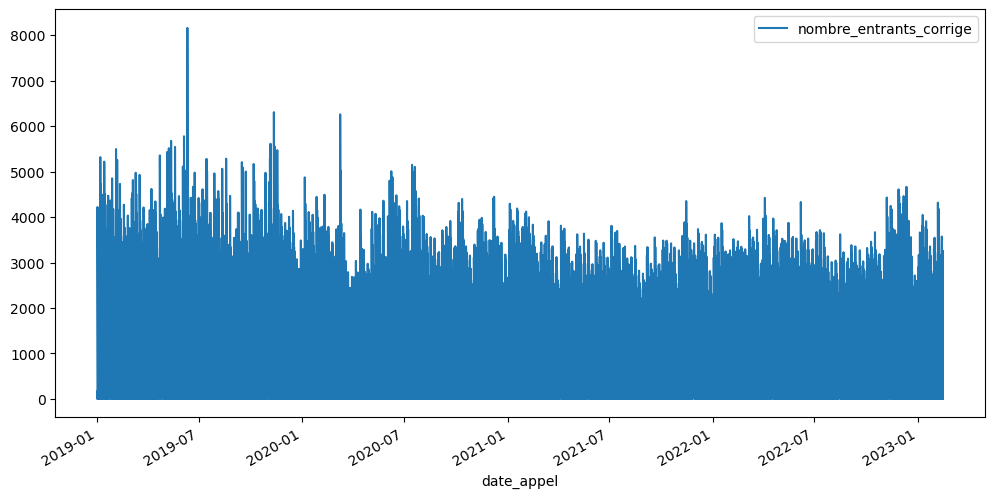

In [5]:
df_telephone.plot(x='date_appel', y='nombre_entrants_corrige',figsize=(12,6))

In [6]:
df_telephone.set_index('date_appel',inplace=True)
df_telephone

entite famille  nombre_entrants_corrige
date_appel                                           
2019-01-02  Entite 1      F2               165.000000
2019-01-02  Entite 1      F3                54.000000
2019-01-02  Entite 1      F4                 1.000000
2019-01-02  Entite 1      F5                99.000000
2019-01-02  Entite 1      F6              1487.000000
...              ...     ...                      ...
2023-02-15  Entite 5      F2               708.329712
2023-02-15  Entite 5      F3               738.935876
2023-02-15  Entite 5      F5               463.642180
2023-02-15  Entite 5      F6               694.321440
2023-02-15  Entite 5      F7              3248.480370

[23783 rows x 3 columns]

In [7]:
df_telephone = df_telephone.loc["2021":]

/tmp/ipykernel_9714/2545339327.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_telephone.resample('M').mean().plot()


<AxesSubplot:xlabel='date_appel'>

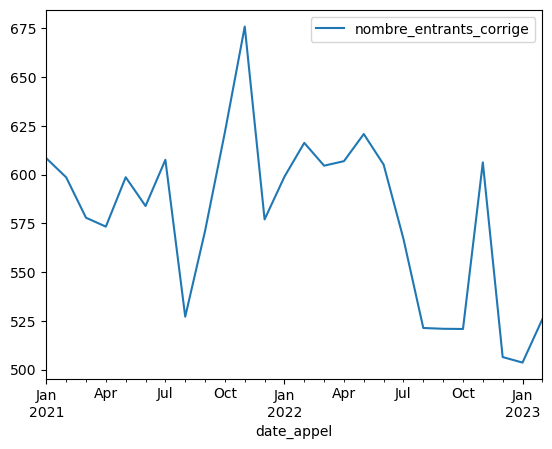

In [8]:
df_telephone.resample('M').mean().plot()

/tmp/ipykernel_9714/746370824.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_telephone.resample('Y').mean().plot()


<AxesSubplot:xlabel='date_appel'>

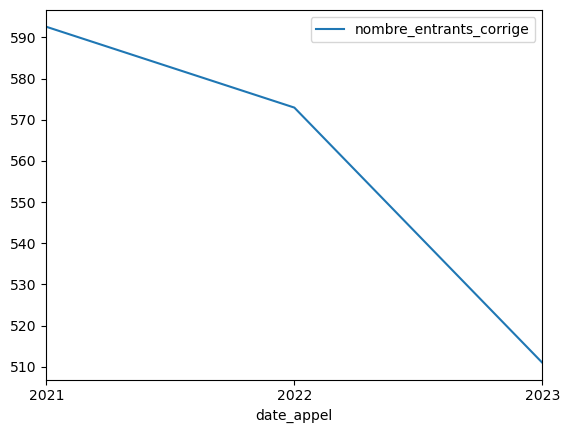

In [9]:
df_telephone.resample('Y').mean().plot()

In [10]:
df_telephone.index

DatetimeIndex(['2021-01-02', '2021-01-02', '2021-01-02', '2021-01-02',
               '2021-01-02', '2021-01-02', '2021-01-02', '2021-01-02',
               '2021-01-02', '2021-01-02',
               ...
               '2023-02-15', '2023-02-15', '2023-02-15', '2023-02-15',
               '2023-02-15', '2023-02-15', '2023-02-15', '2023-02-15',
               '2023-02-15', '2023-02-15'],
              dtype='datetime64[ns]', name='date_appel', length=12059, freq=None)

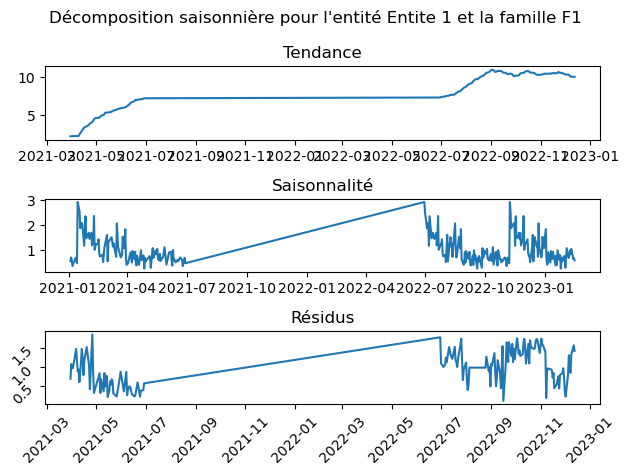

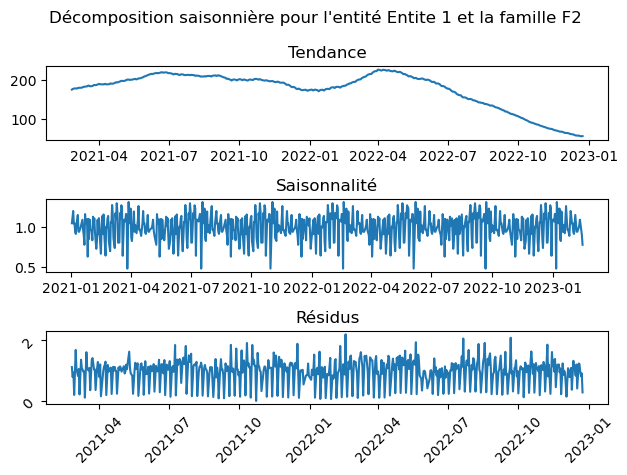

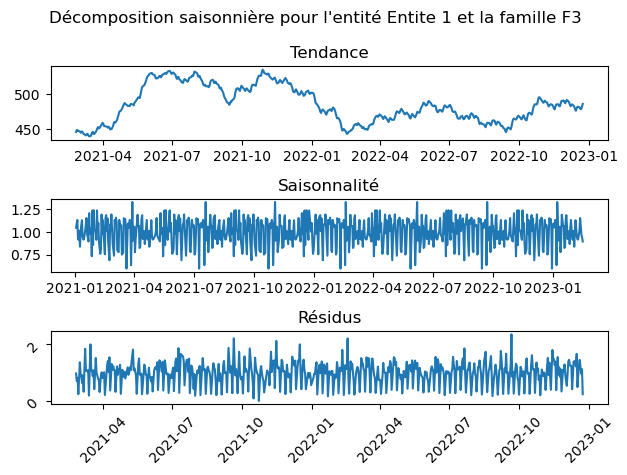

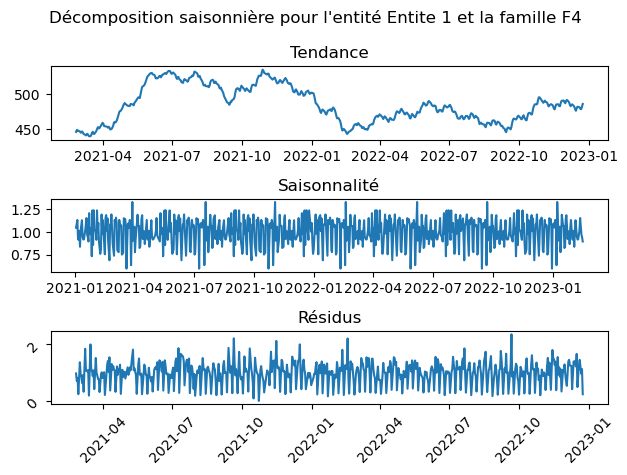

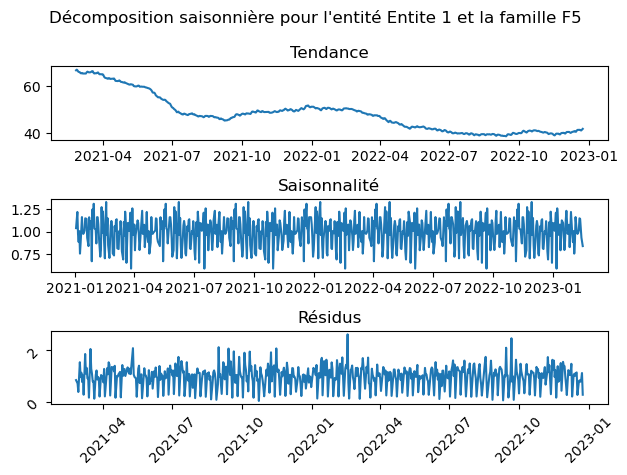

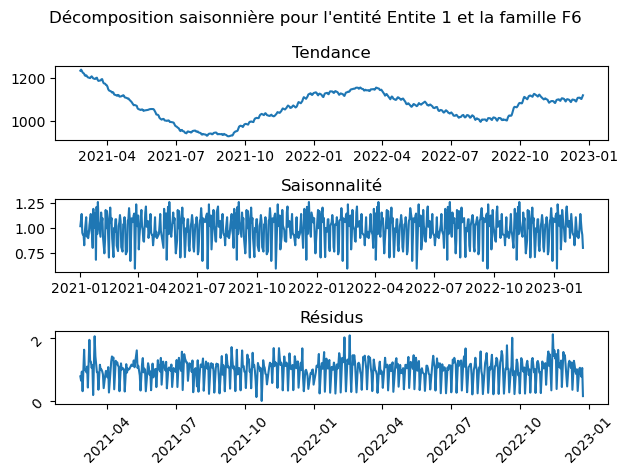

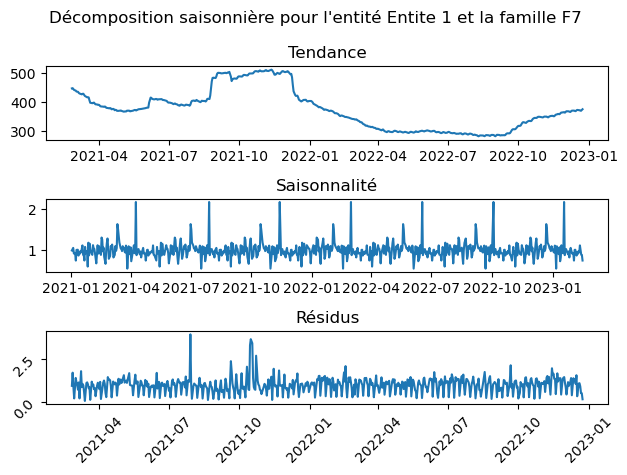

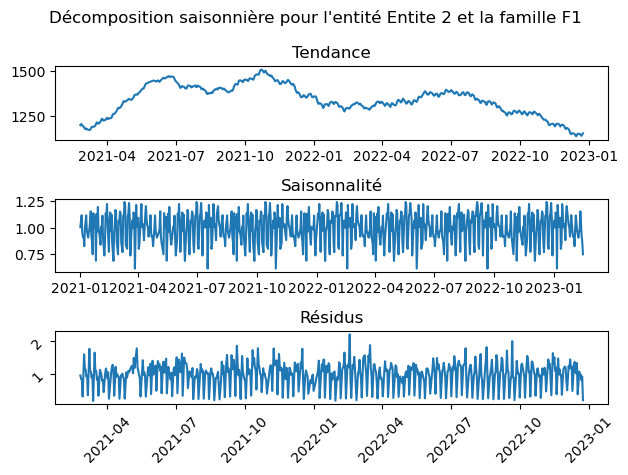

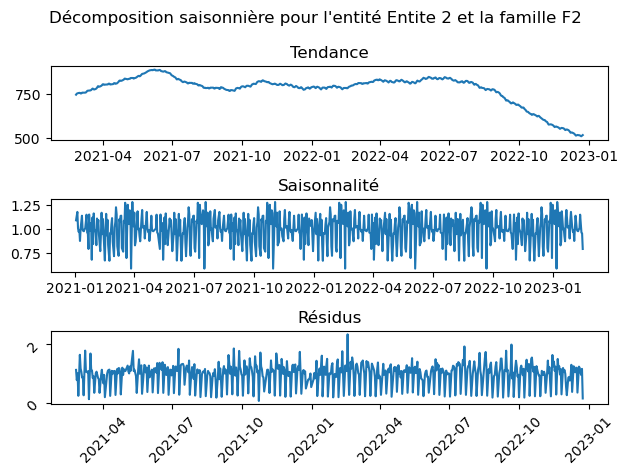

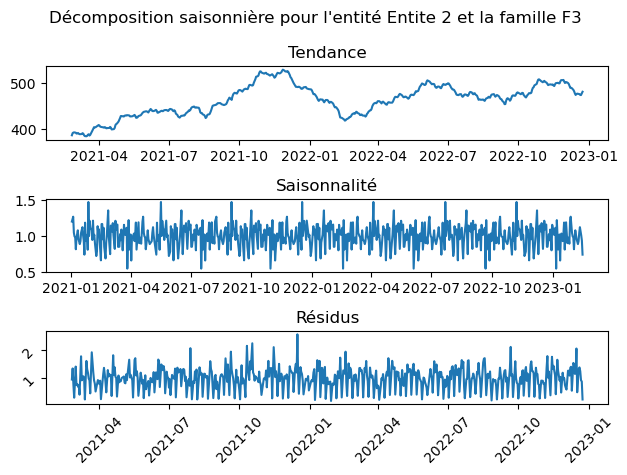

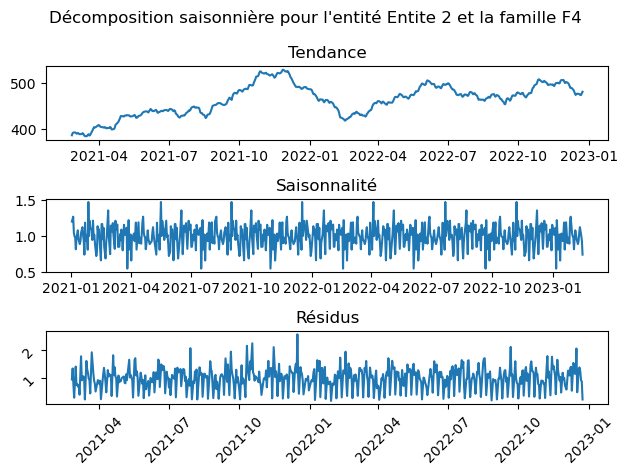

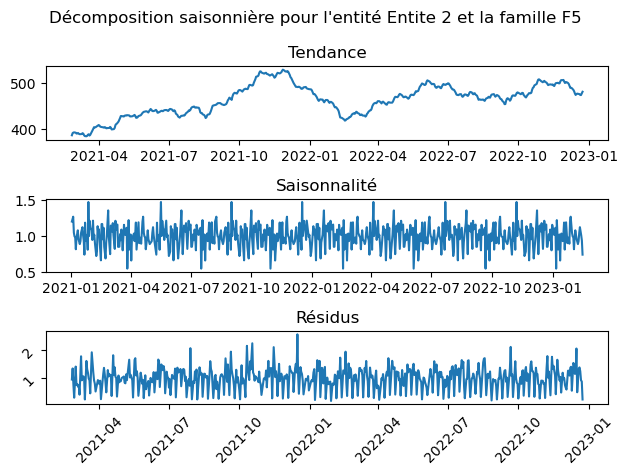

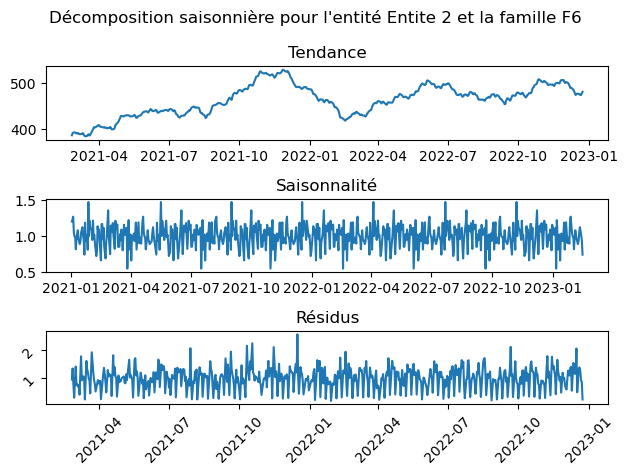

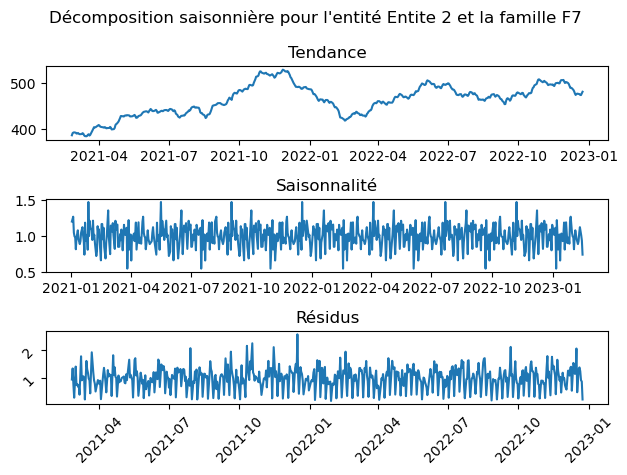

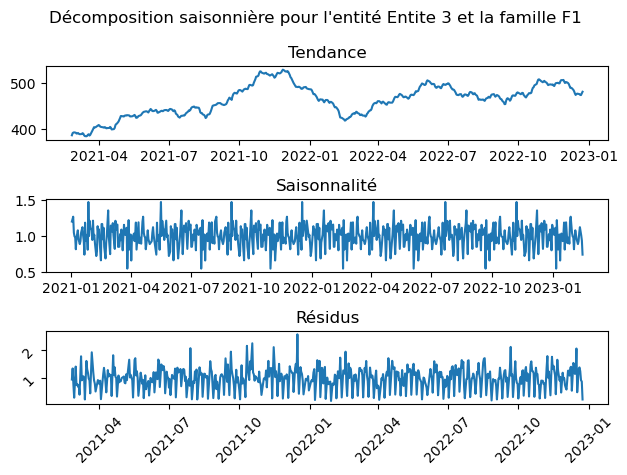

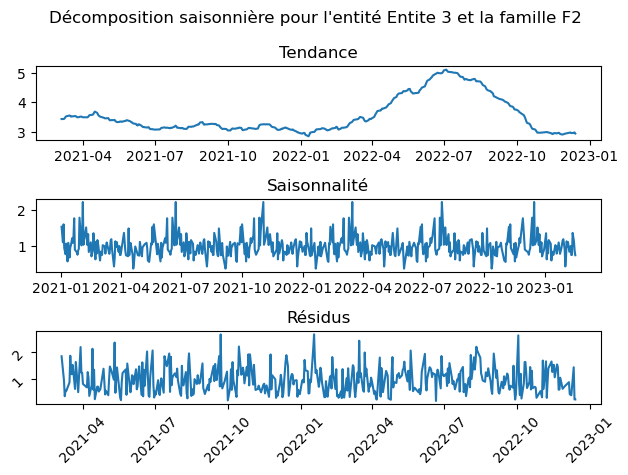

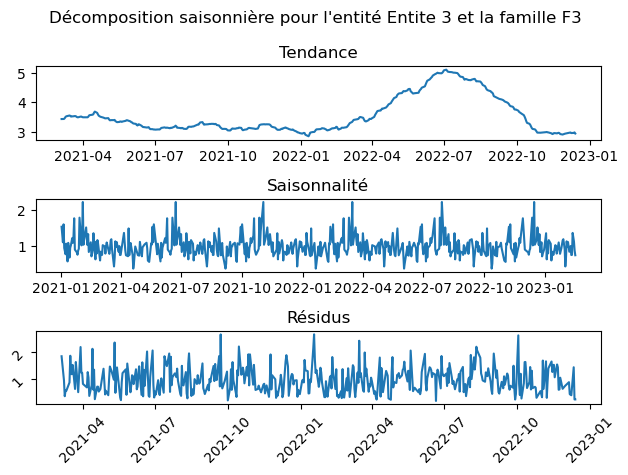

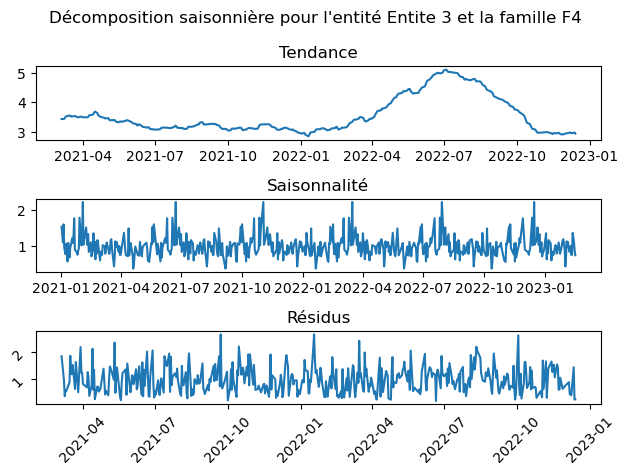

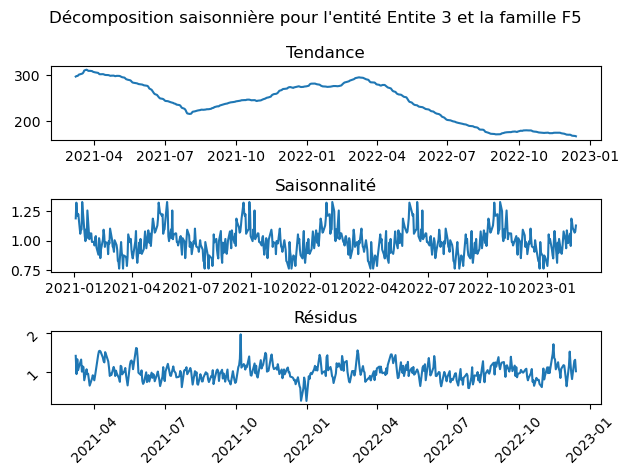

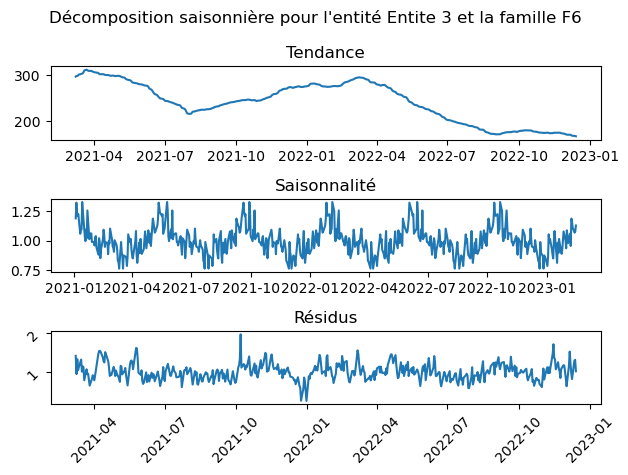

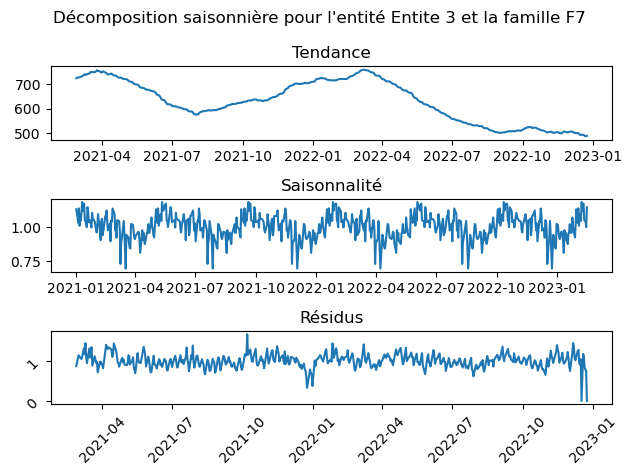

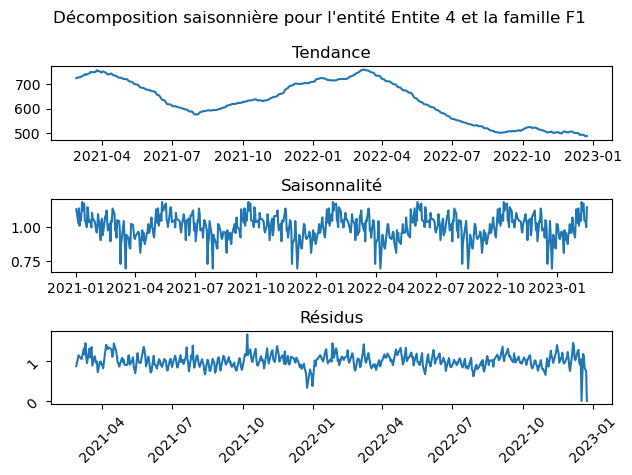

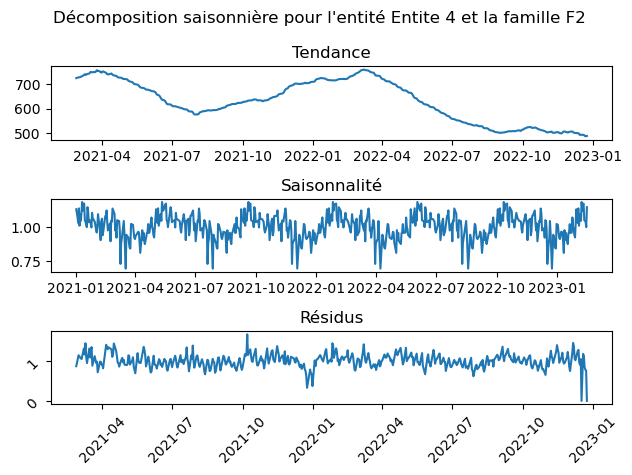

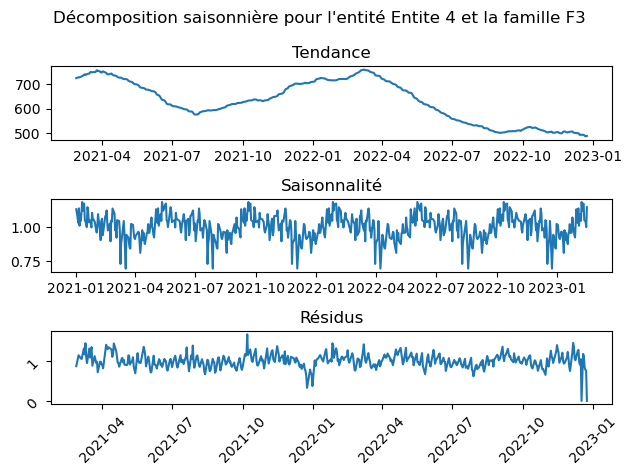

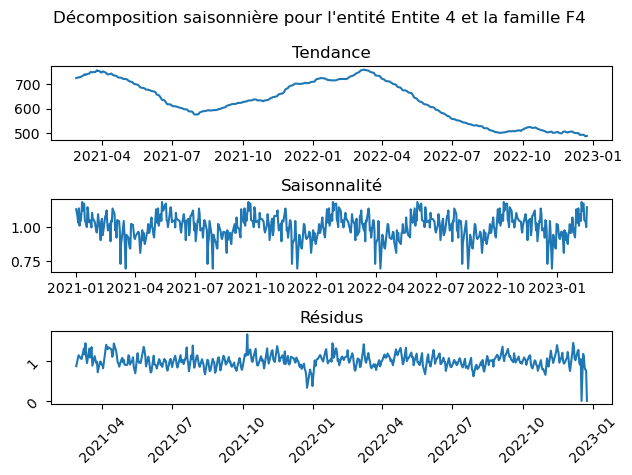

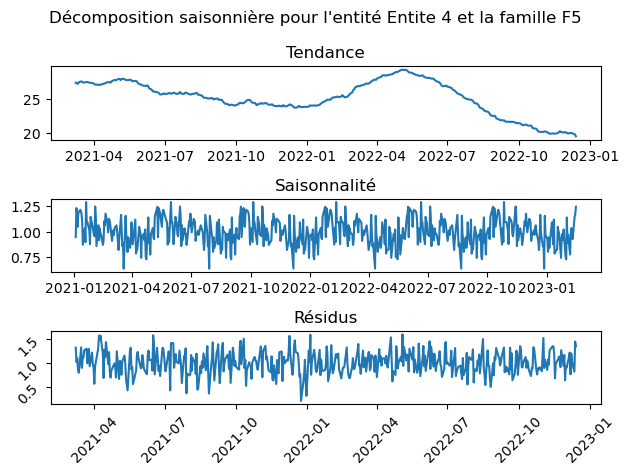

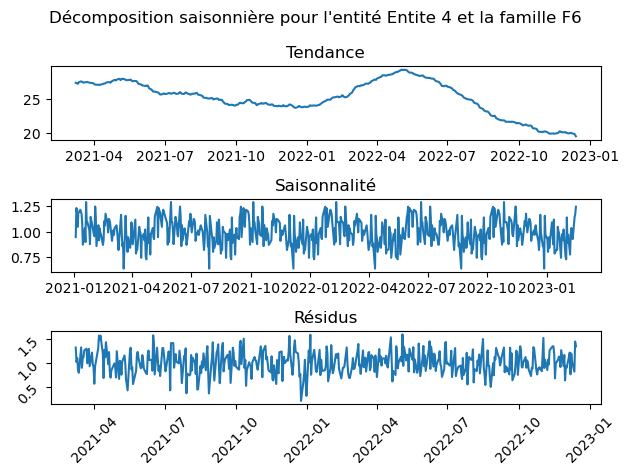

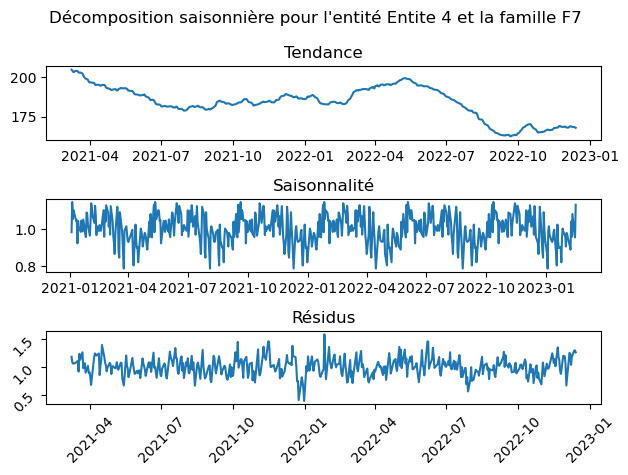

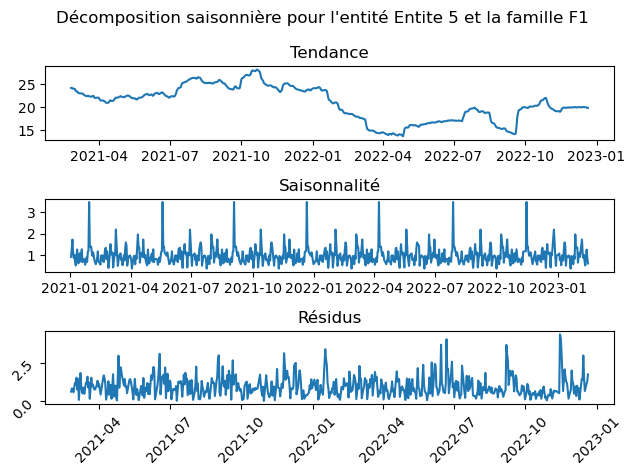

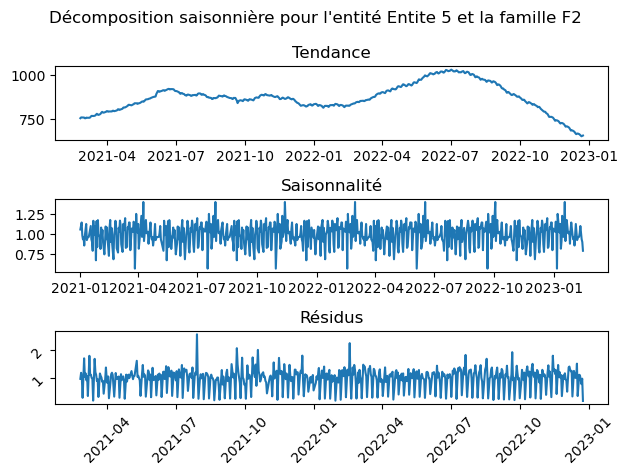

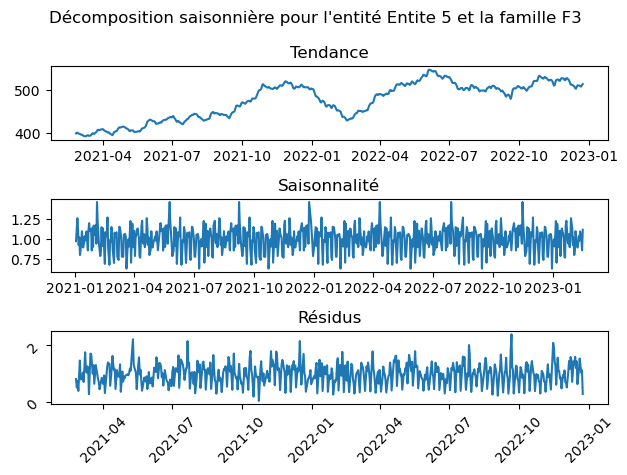

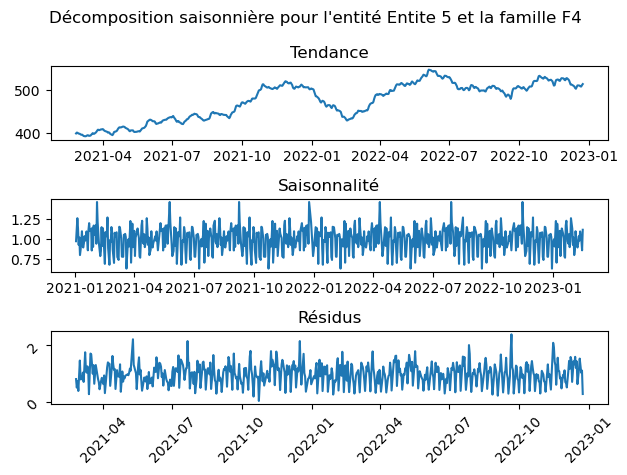

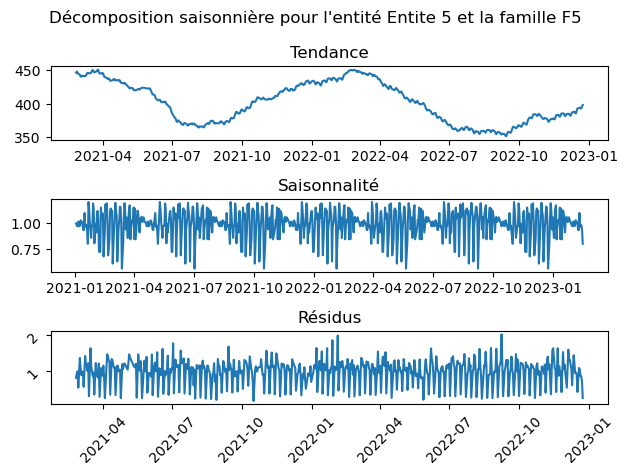

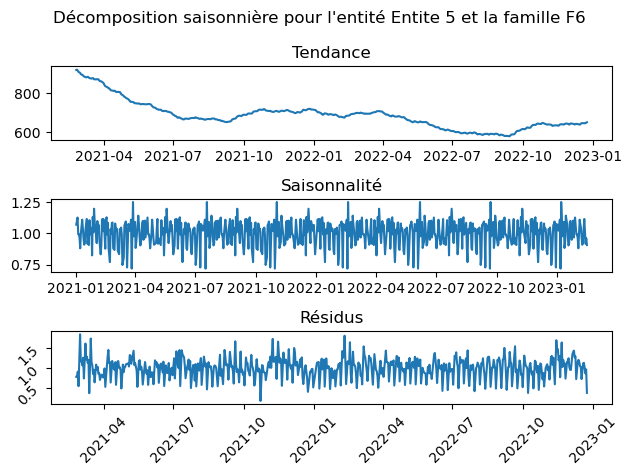

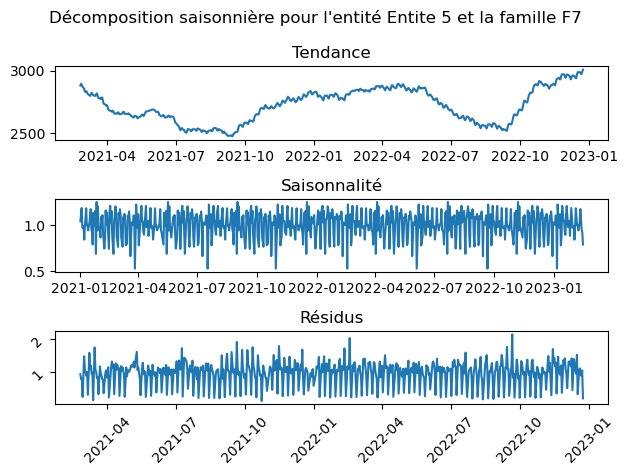

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Déterminer les entités et les familles uniques dans le DataFrame
entites = df_telephone['entite'].sort_values().unique()
familles = df_telephone['famille'].sort_values().unique()

# Boucle sur chaque entité et famille
for entite in entites:
    for famille in familles:
        # Sélectionner les données spécifiques à l'entité et à la famille
        data = df_telephone[(df_telephone['entite'] == entite) & (df_telephone['famille'] == famille)]


        # Convertir la colonne 'nombre_entrants_corrige' en une série avec l'index de date
        series = pd.Series(data=data['nombre_entrants_corrige'], index=data.index)

        # Effectuer la décomposition saisonnière en spécifiant la période
        try : 
            decompose_result_mult = seasonal_decompose(series, model='multiplicative', period=90)

            # Extraire les composantes de la décomposition
            trend = decompose_result_mult.trend
            seasonal = decompose_result_mult.seasonal
            residual = decompose_result_mult.resid

            # Afficher les composantes de la décomposition
        

        except : "pas assez de donnée "
        plt.figure()
        plt.subplot(3, 1, 1)
        plt.plot(trend)
        plt.title("Tendance")
        plt.subplot(3, 1, 2)
        plt.plot(seasonal)
        plt.title("Saisonnalité")
        plt.subplot(3, 1, 3)
        plt.plot(residual)
        plt.title("Résidus")
        plt.tick_params( rotation=45)
        plt.suptitle("Décomposition saisonnière pour l'entité {} et la famille {}".format(entite, famille))
        plt.tight_layout()
        plt.show()



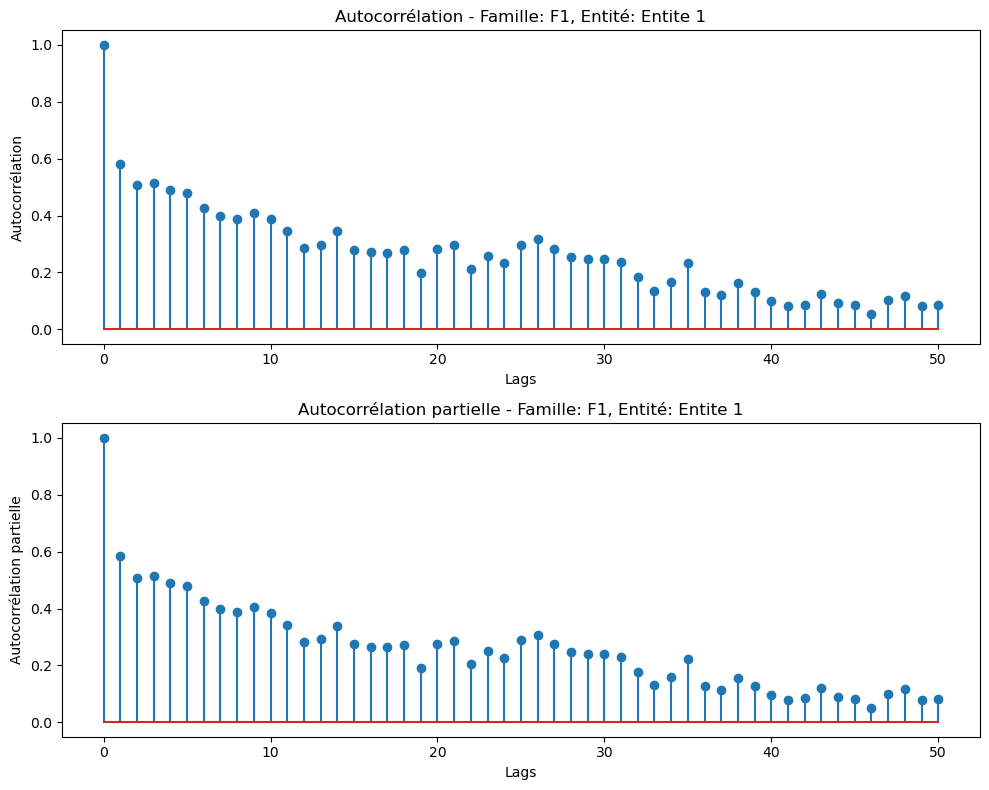

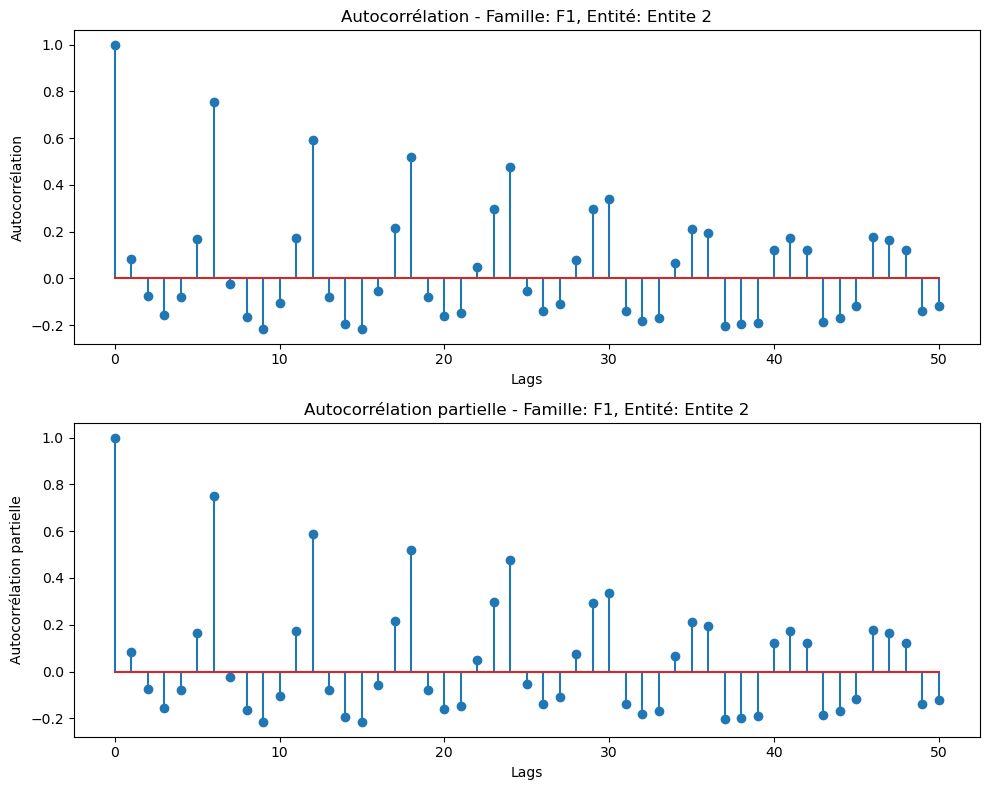

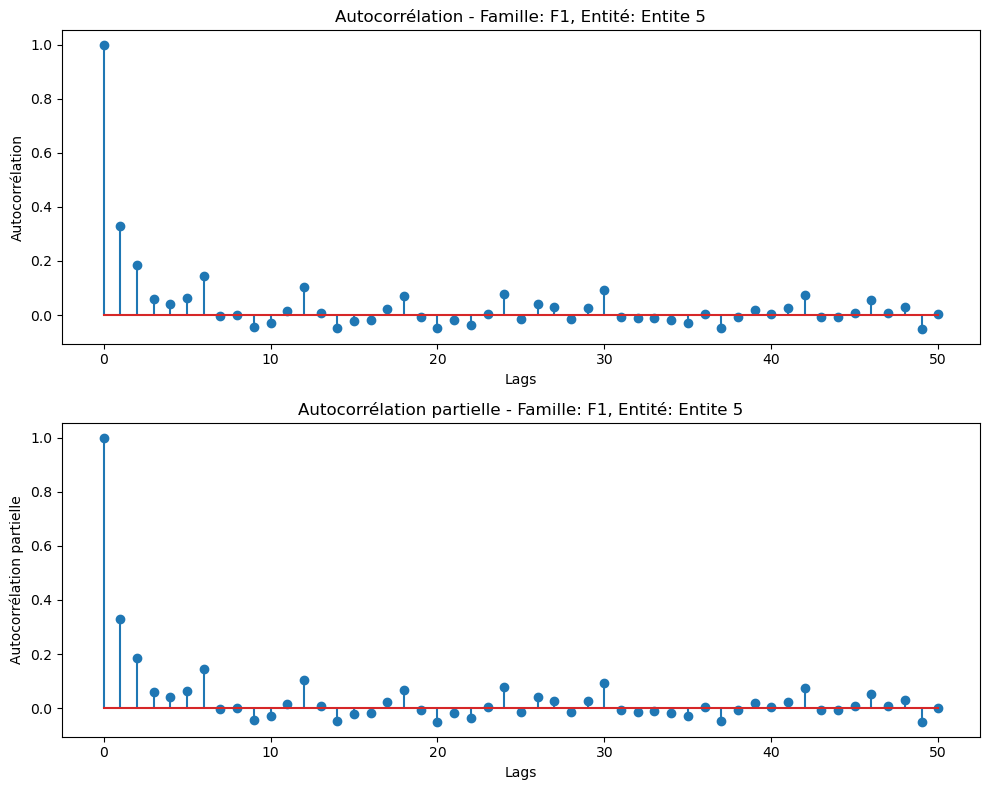

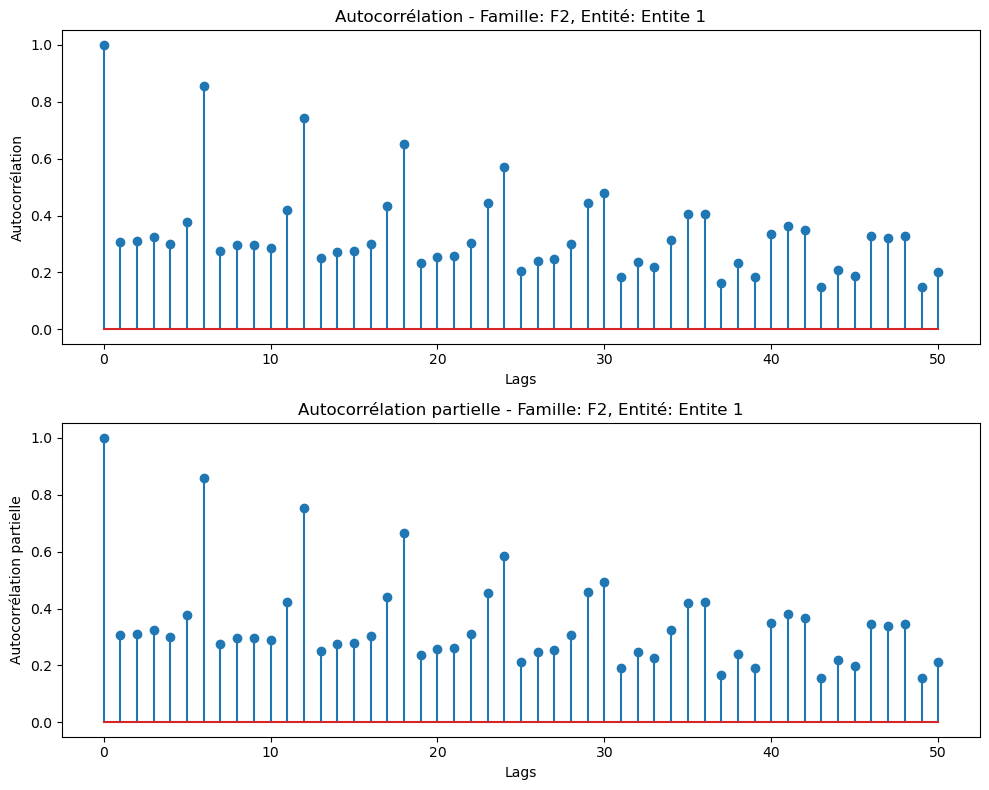

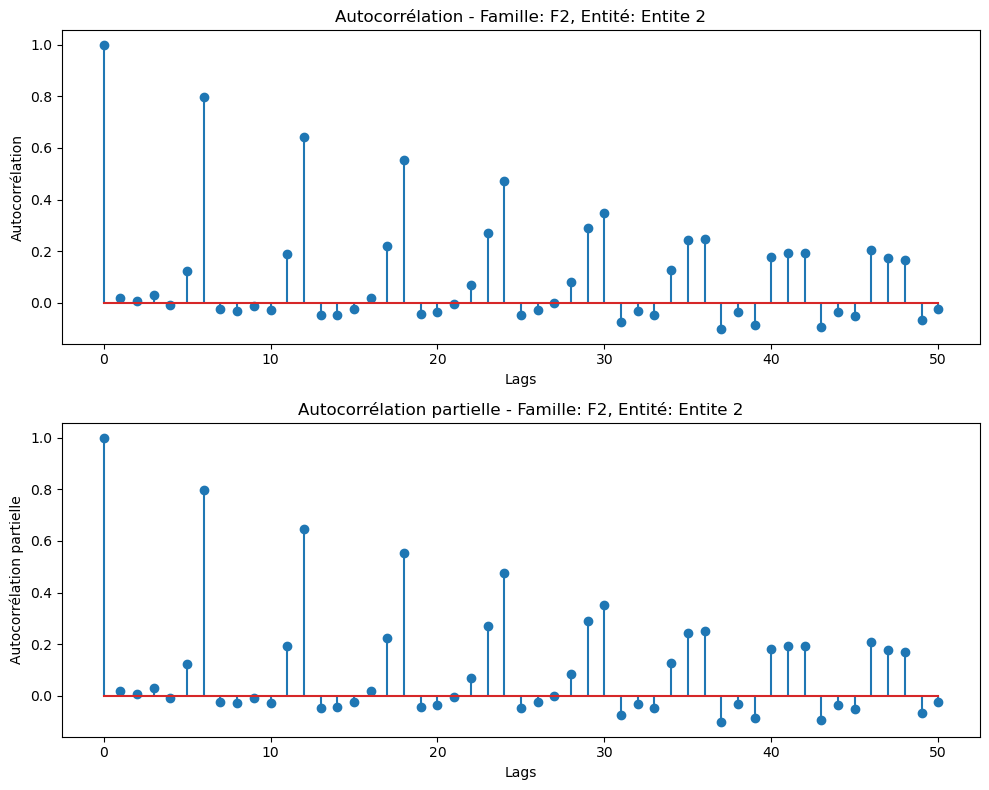

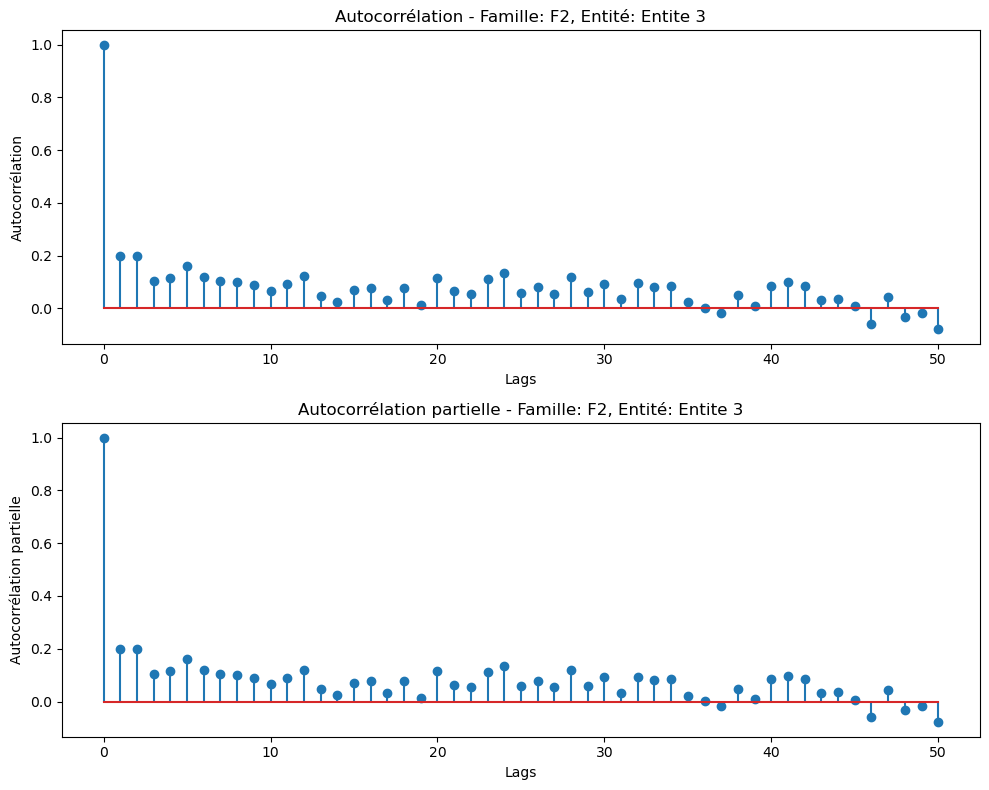

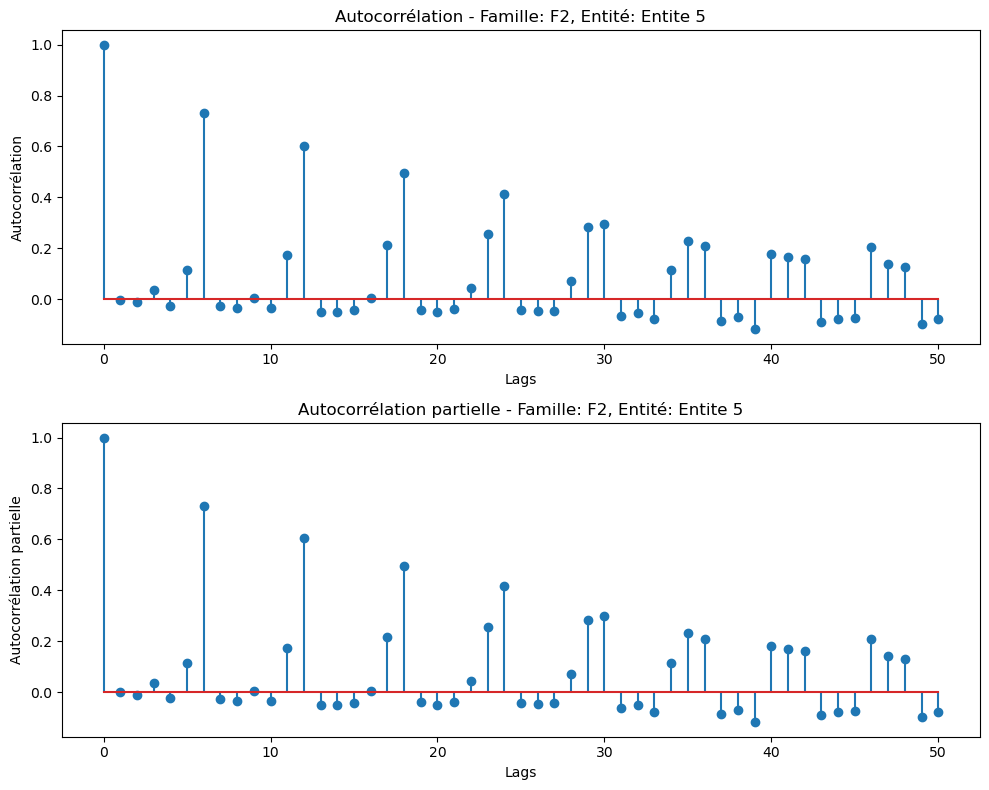

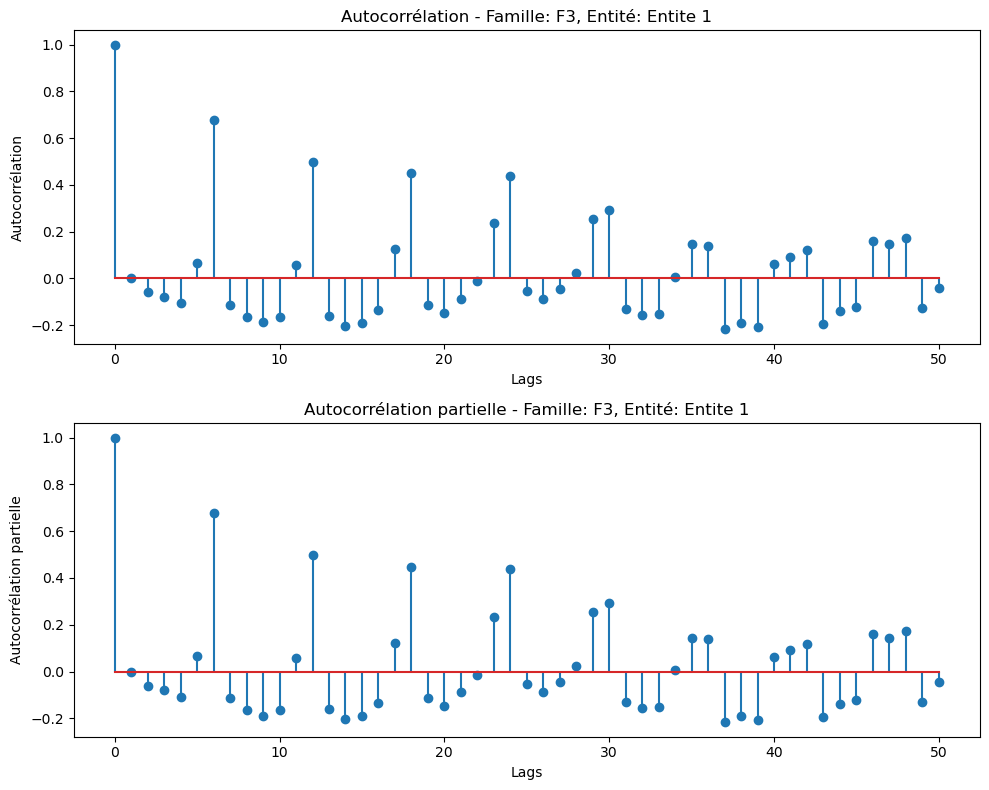

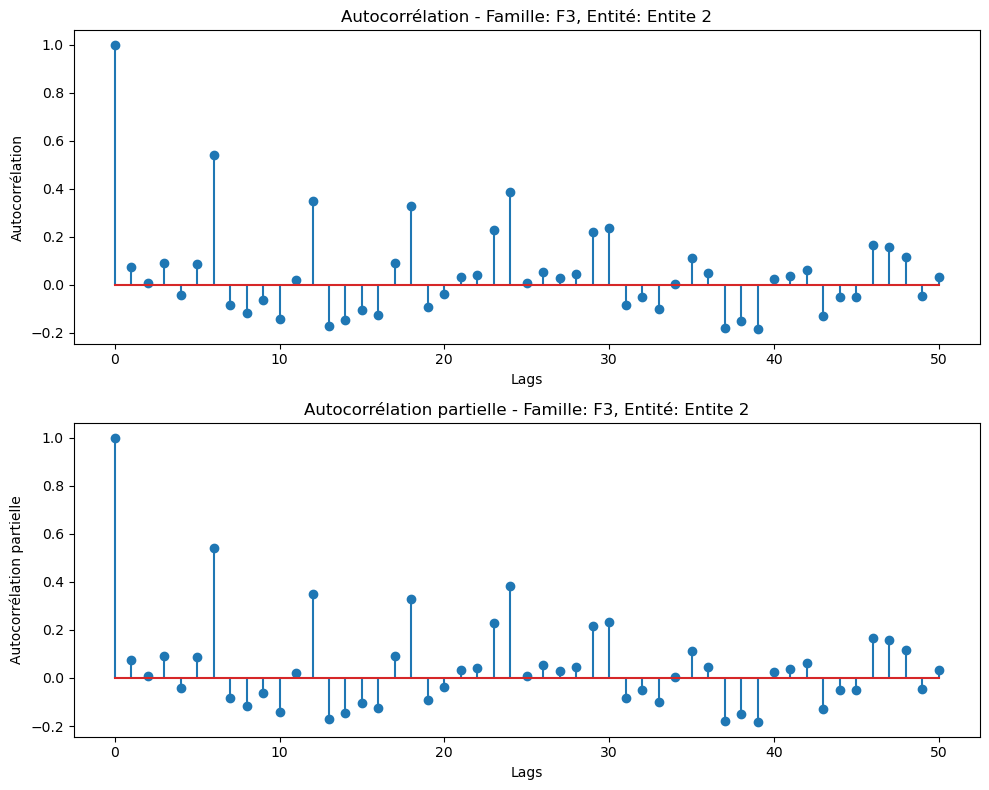

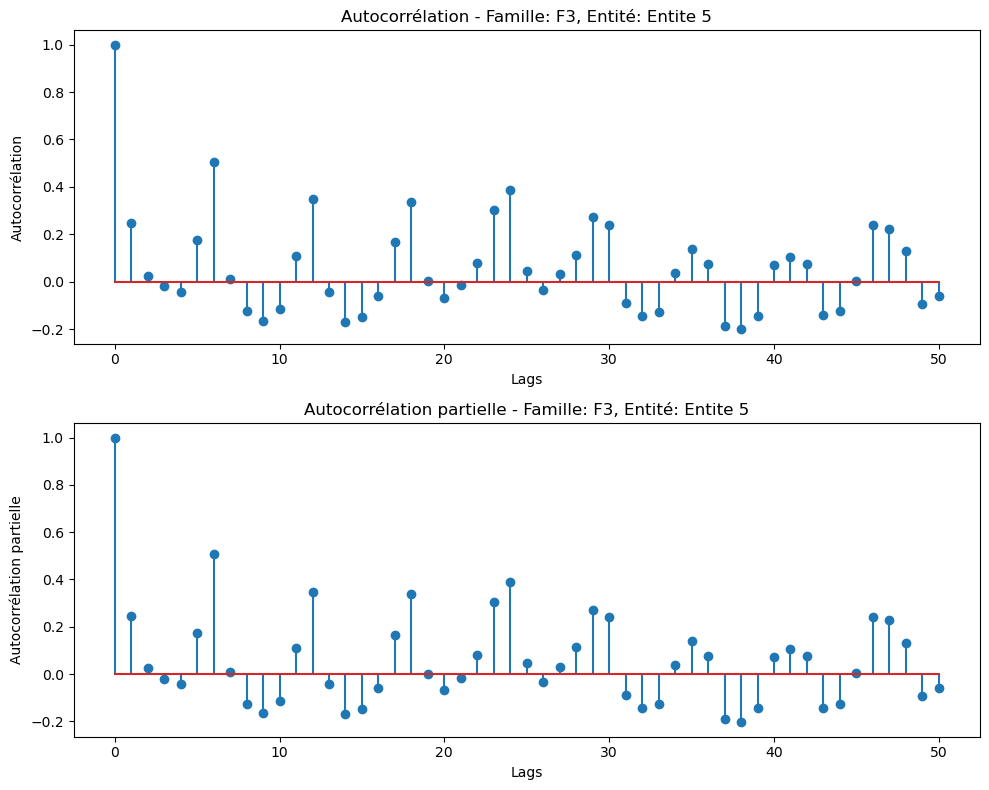

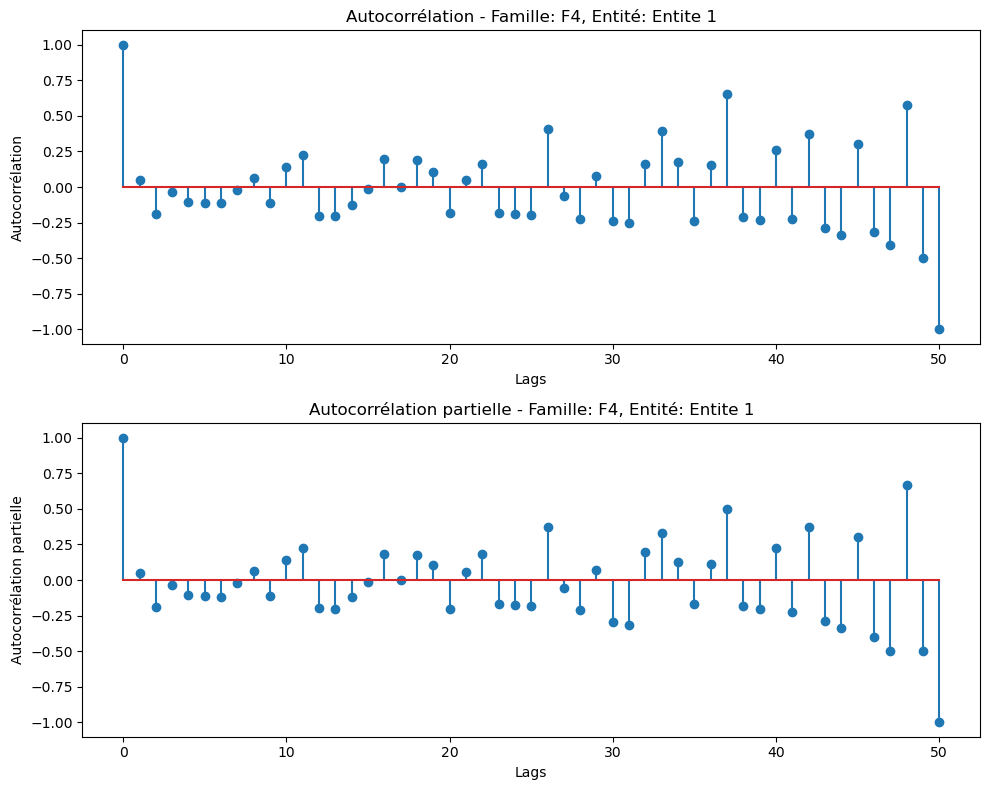

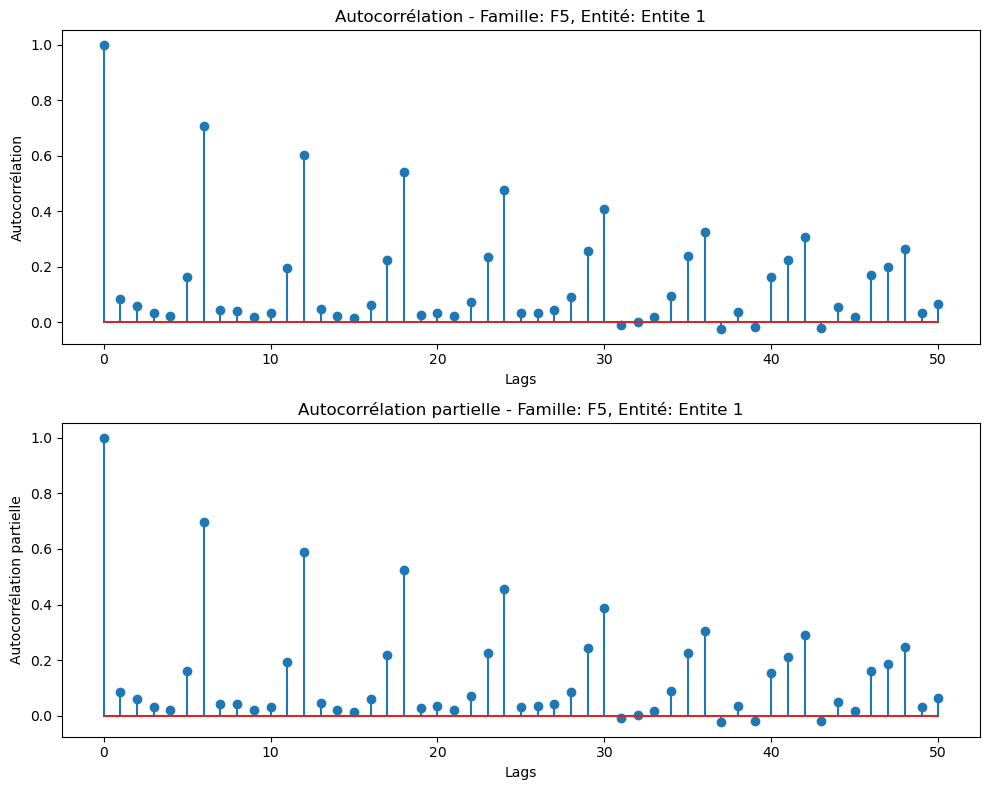

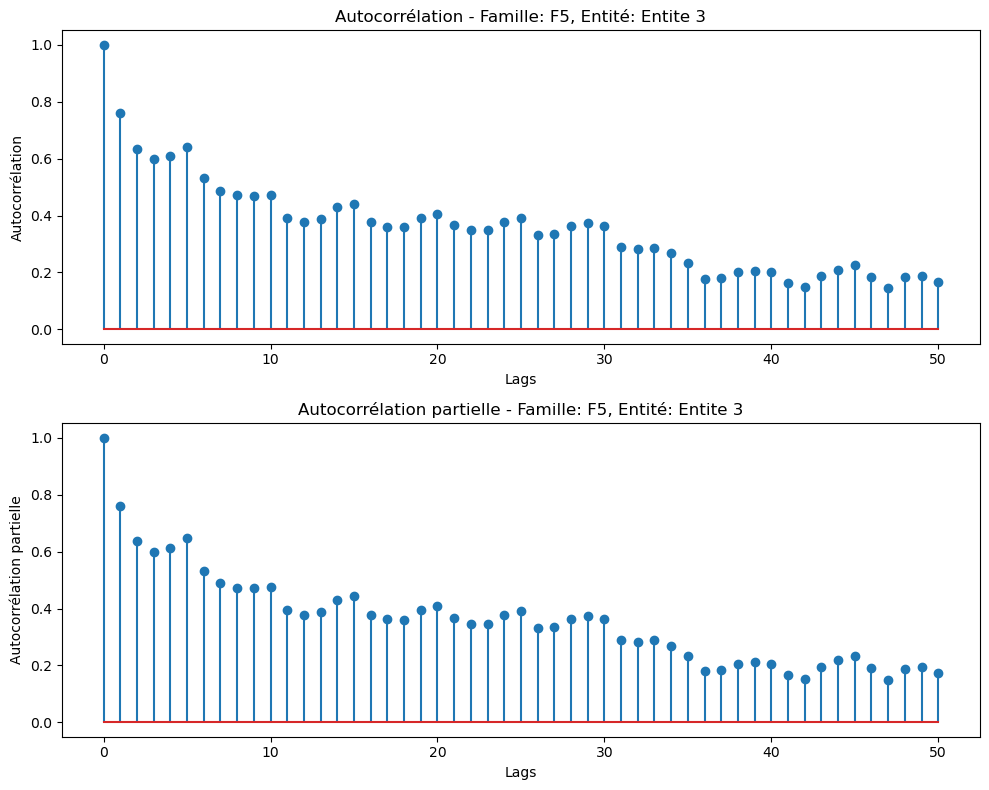

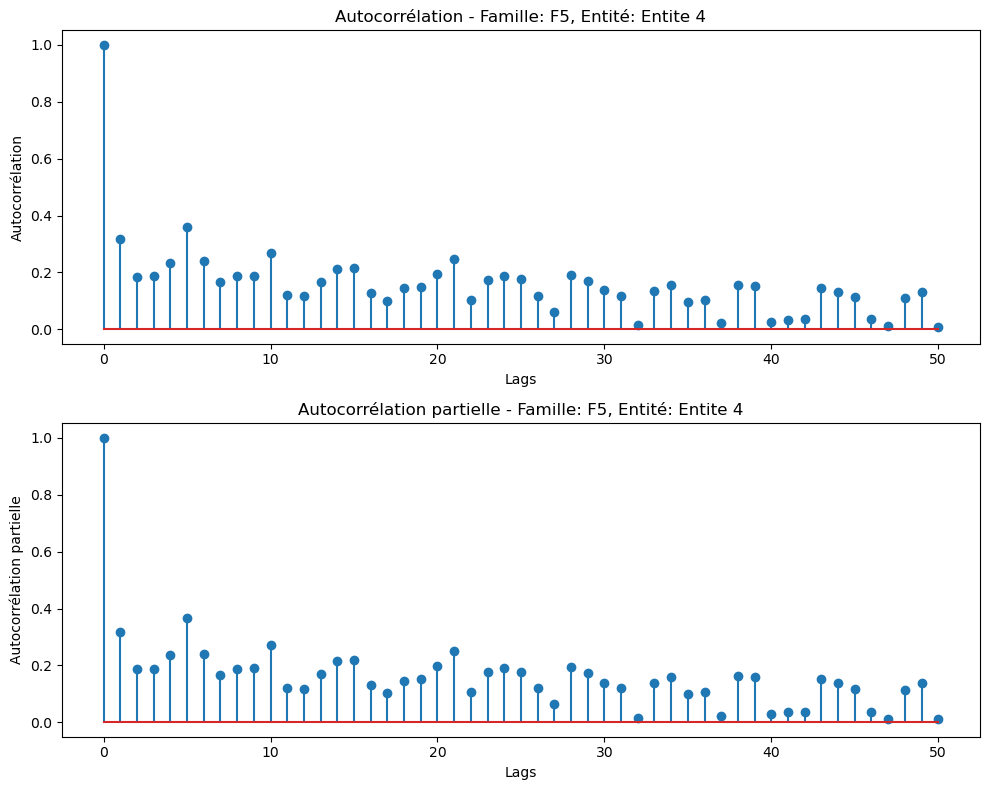

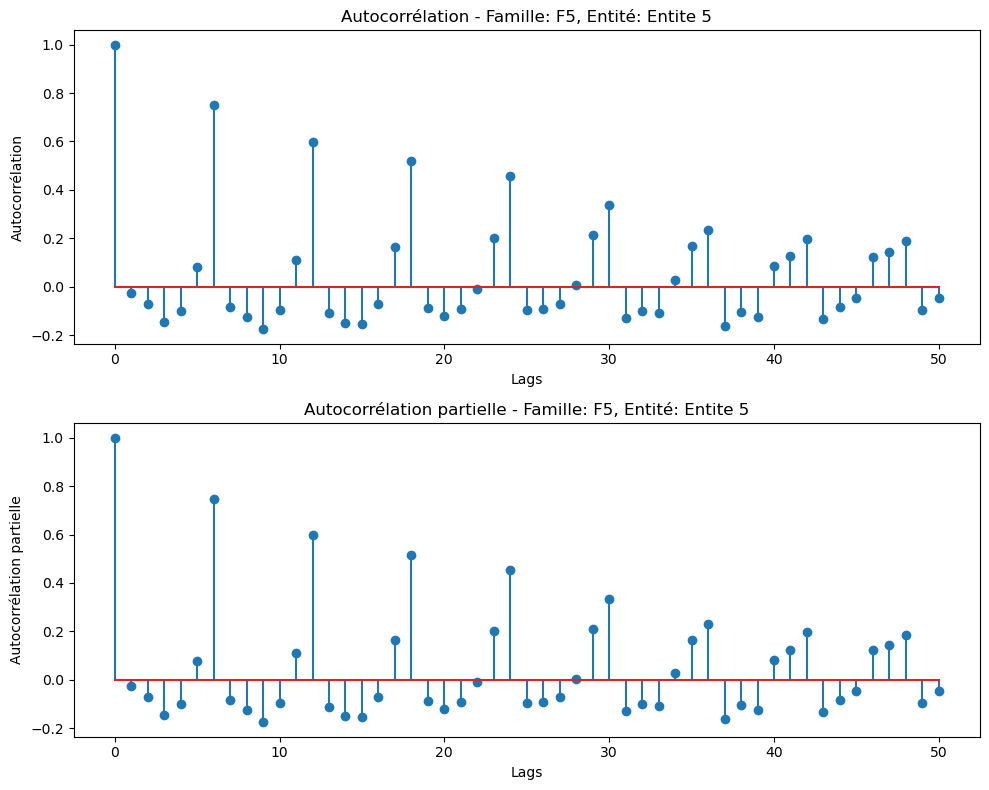

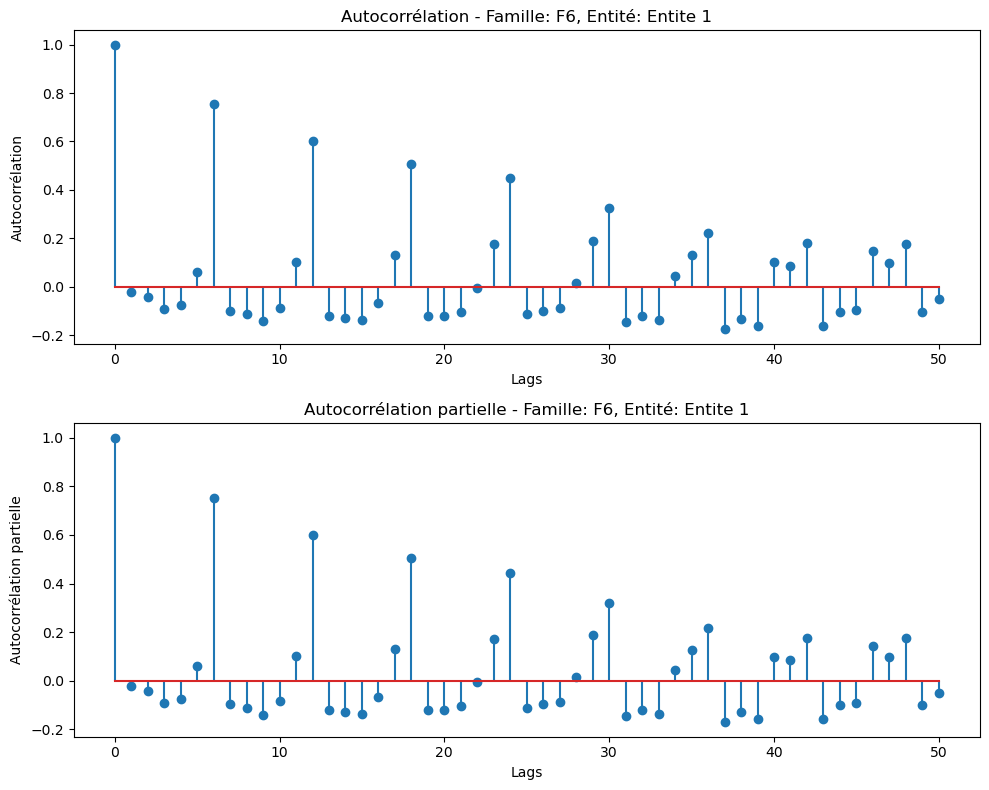

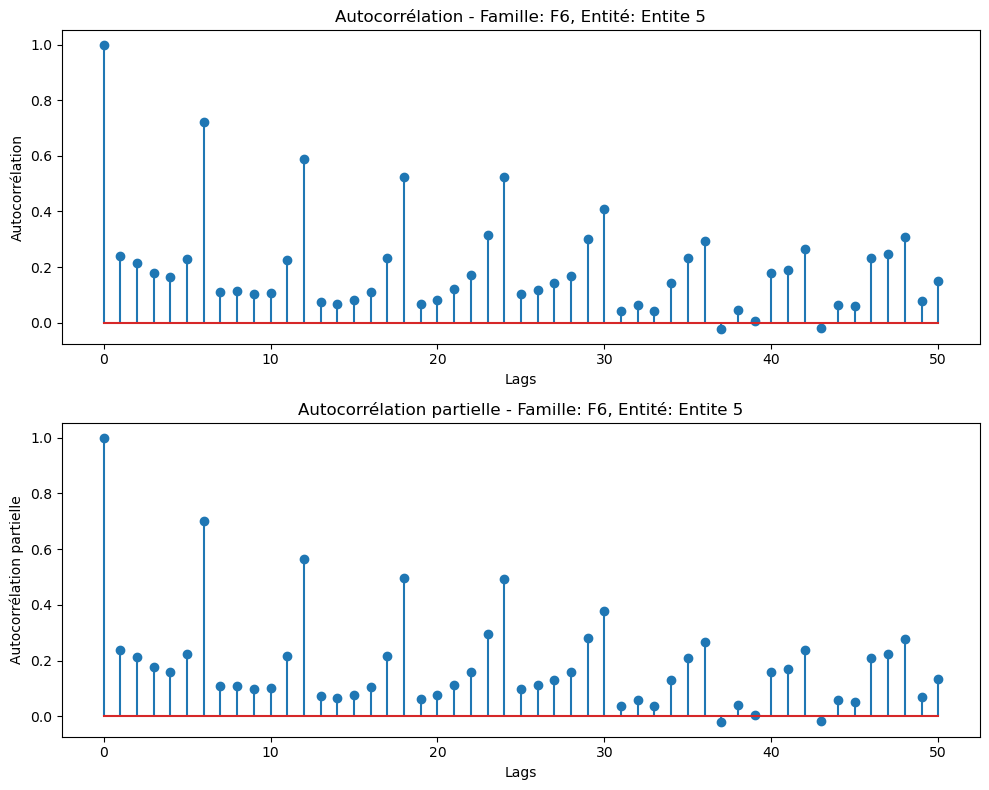

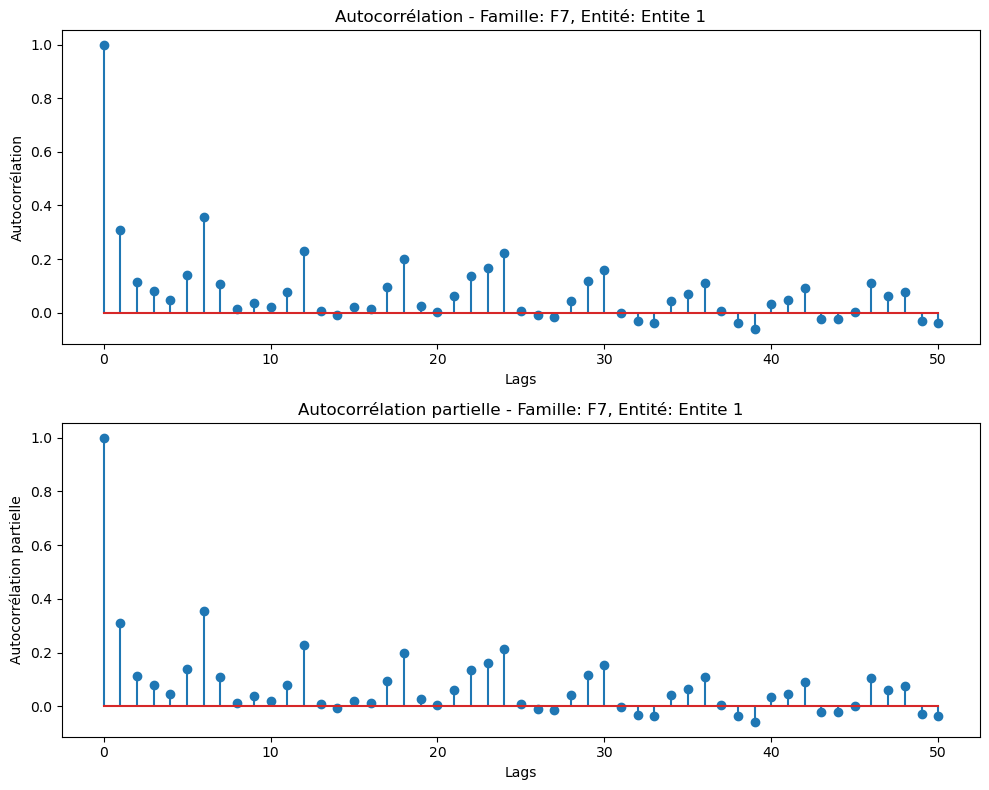

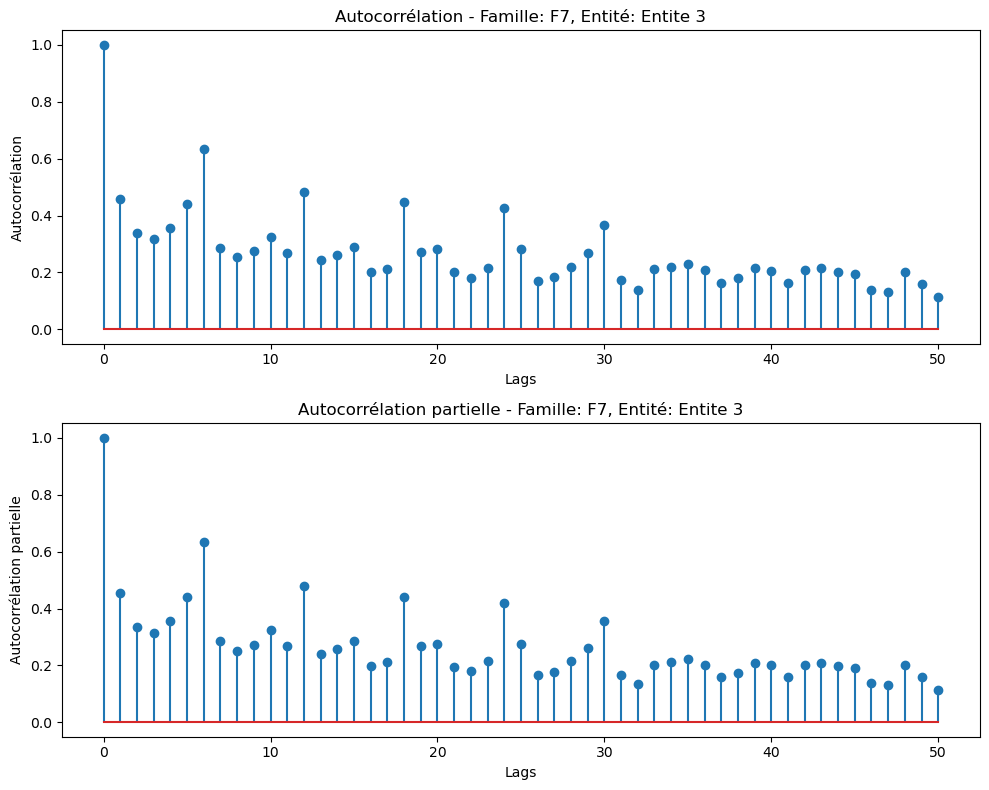

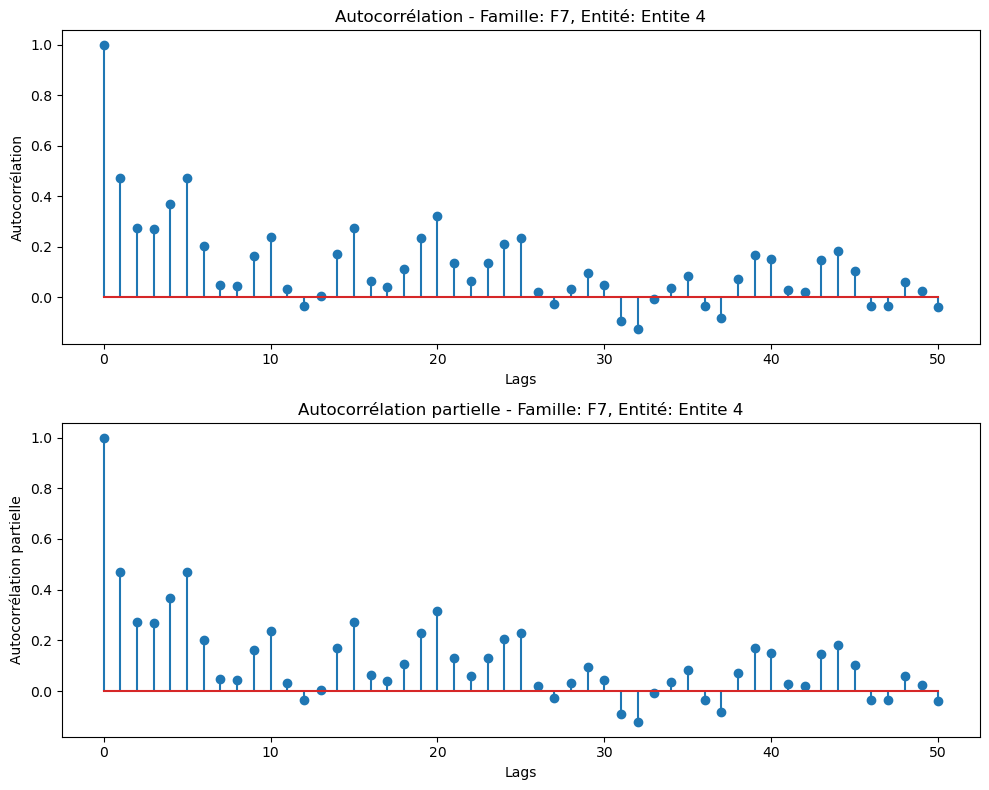

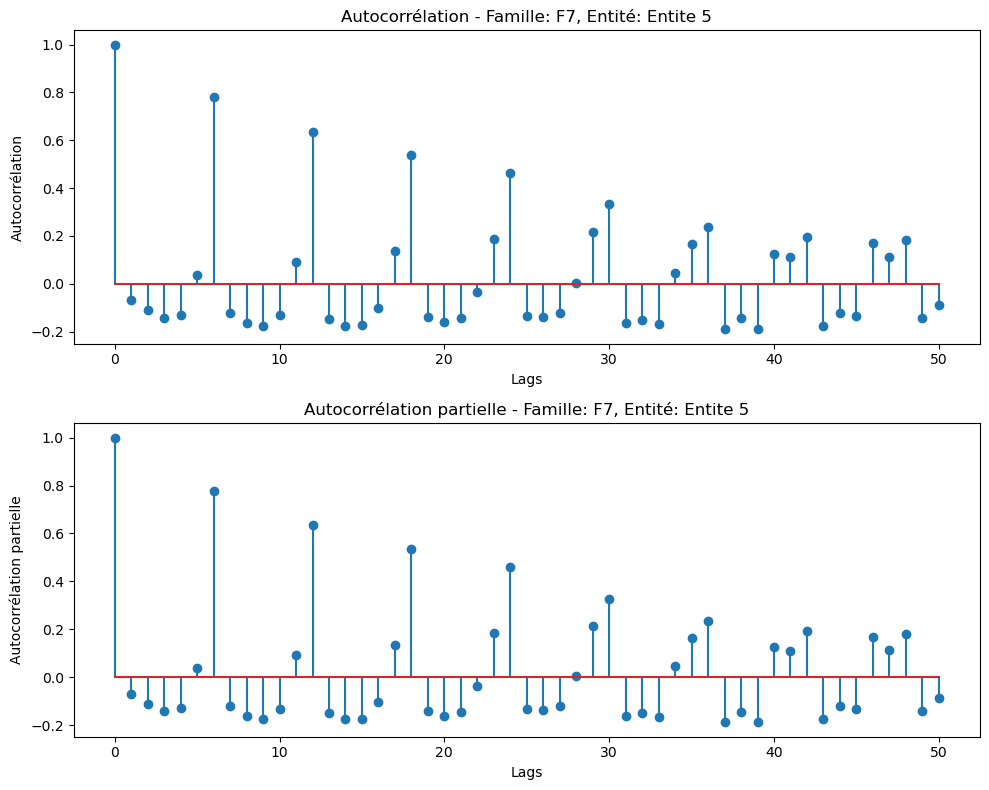

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def plot_acf_custom(serie, ax, lags):
    autocorr = [1.0] + [np.corrcoef(serie[:-k], serie[k:])[0, 1] for k in range(1, lags+1)]
    ax.stem(range(lags+1), autocorr, use_line_collection=True)
    ax.set_xlabel('Lags')
    ax.set_ylabel('Autocorrélation')
    ax.set_title('Autocorrélation')

def plot_pacf_custom(serie, ax, lags):
    pacf = [1.0] + [np.linalg.lstsq(np.column_stack((serie[:-k], np.ones_like(serie[:-k]))), serie[k:], rcond=None)[0][0] for k in range(1, lags+1)]
    ax.stem(range(lags+1), pacf, use_line_collection=True)
    ax.set_xlabel('Lags')
    ax.set_ylabel('Autocorrélation partielle')
    ax.set_title('Autocorrélation partielle')

# Parcourir chaque famille_entite et tracer les graphiques d'autocorrélation
for famille_entite, data_famille_entite in df_telephone.groupby(['famille', 'entite']):
    # Extraire les données spécifiques à la famille_entite
    serie = data_famille_entite['nombre_entrants_corrige']

    # Vérifier s'il y a suffisamment de valeurs pour le tracé de l'autocorrélation
    if len(serie) <= 50:
        continue  # Passer à la prochaine famille_entite si le nombre de valeurs est insuffisant

    # Créer les subplots pour les graphiques d'autocorrélation et d'autocorrélation partielle
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))

    # Tracer le graphique d'autocorrélation
    plot_acf_custom(serie, ax=ax[0], lags=50)
    ax[0].set_title(f"Autocorrélation - Famille: {famille_entite[0]}, Entité: {famille_entite[1]}")

    # Tracer le graphique d'autocorrélation partielle
    plot_pacf_custom(serie, ax=ax[1], lags=50)
    ax[1].set_title(f"Autocorrélation partielle - Famille: {famille_entite[0]}, Entité: {famille_entite[1]}")

    # Ajuster l'espacement entre les subplots
    plt.tight_layout()

    # Afficher les graphiques
    plt.show()



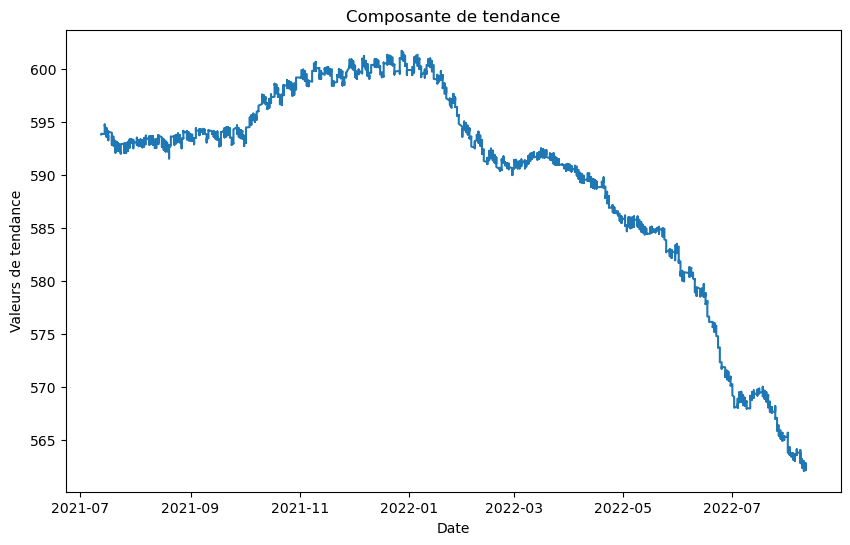

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Convertir la colonne 'nombre_entrants_corrige' en une série avec l'index de date
series = pd.Series(data=df_telephone['nombre_entrants_corrige'], index=df_telephone.index)

# Effectuer la décomposition saisonnière en spécifiant la période
decompose_result = seasonal_decompose(series, model='multiplicative', period=int(12059/2.0))

# Extraire la composante de tendance
trend = decompose_result.trend

# Tracer le graphique de la composante de tendance
plt.figure(figsize=(10, 6))
plt.plot(trend)
plt.title("Composante de tendance")
plt.xlabel("Date")
plt.ylabel("Valeurs de tendance")
plt.show()


In [14]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Parcourir chaque famille_entite et effectuer le test ADF
for famille_entite, data_famille_entite in df_telephone.groupby(['famille', 'entite']):
    # Extraire les données spécifiques à la famille_entite
    serie = data_famille_entite['nombre_entrants_corrige']

    # Effectuer le test ADF
    result = adfuller(serie)

    # Extraire les résultats du test
    adf_stat = result[0]
    p_value = result[1]
    critical_values = result[4]

    # Afficher les résultats
    print(f"Résultats pour la famille: {famille_entite[0]}, Entité: {famille_entite[1]}")
    print(f"Statistique ADF: {adf_stat}")
    print(f"Valeur p: {p_value}")
    print("Valeurs critiques :")
    for key, value in critical_values.items():
        print(f"\t{key}: {value}")
    print("-----------------------------------")


Résultats pour la famille: F1, Entité: Entite 1
Statistique ADF: -3.099399443497047
Valeur p: 0.02659766428802622
Valeurs critiques :
	1%: -3.4566744514553016
	5%: -2.8731248767783426
	10%: -2.5729436702592023
-----------------------------------
Résultats pour la famille: F1, Entité: Entite 2
Statistique ADF: -2.7126347395527164
Valeur p: 0.07187730993412568
Valeurs critiques :
	1%: -3.4408393249134326
	5%: -2.86616806030903
	10%: -2.569234676071002
-----------------------------------
Résultats pour la famille: F1, Entité: Entite 4
Statistique ADF: -7.3506738732375085
Valeur p: 1.0079479822333445e-10
Valeurs critiques :
	1%: -4.9386902332361515
	5%: -3.477582857142857
	10%: -2.8438679591836733
-----------------------------------
Résultats pour la famille: F1, Entité: Entite 5
Statistique ADF: -8.187382226052524
Valeur p: 7.833086726328694e-13
Valeurs critiques :
	1%: -3.4407228537258865
	5%: -2.866116759417764
	10%: -2.5692073421780983
-----------------------------------
Résultats pour

In [22]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Créer une liste pour stocker les résultats
results = []

# Parcourir chaque famille_entite et effectuer le test ADF
for famille_entite, data_famille_entite in df_telephone.groupby(['famille', 'entite']):
    # Extraire les données spécifiques à la famille_entite
    serie = data_famille_entite['nombre_entrants_corrige']

    # Effectuer le test ADF
    result = adfuller(serie)

    # Extraire les résultats du test
    adf_stat = result[0]
    p_value = result[1]
    critical_values = result[4]

    # Vérifier si la série est stationnaire ou non
    is_stationary = p_value < 0.05    # Ajouter les résultats à la liste
    results.append([famille_entite[0], famille_entite[1], "Oui" if is_stationary else "Non"])



# Créer un DataFrame à partir des résultats
df_results = pd.DataFrame(results, columns=['famille', 'entite', 'stationnaire_adf'])

# Afficher le tableau

df_results.to_csv("adf.csv")
df_results

famille    entite stationnaire_adf
0       F1  Entite 1              Oui
1       F1  Entite 2              Non
2       F1  Entite 4              Oui
3       F1  Entite 5              Oui
4       F2  Entite 1              Non
5       F2  Entite 2              Non
6       F2  Entite 3              Oui
7       F2  Entite 5              Non
8       F3  Entite 1              Oui
9       F3  Entite 2              Oui
10      F3  Entite 5              Oui
11      F4  Entite 1              Oui
12      F5  Entite 1              Non
13      F5  Entite 3              Non
14      F5  Entite 4              Oui
15      F5  Entite 5              Non
16      F6  Entite 1              Oui
17      F6  Entite 5              Oui
18      F7  Entite 1              Oui
19      F7  Entite 3              Non
20      F7  Entite 4              Oui
21      F7  Entite 5              Oui

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
df_mail = pd.read_csv("mail.csv")
# Créer une liste pour stocker les résultats
results = []

# Parcourir chaque famille_entite et effectuer le test ADF
for famille_entite, data_famille_entite in df_telephone.groupby(['famille', 'entite']):
    # Extraire les données spécifiques à la famille_entite
    serie = data_famille_entite['nombre_entrants_corrige']

    # Effectuer le test ADF
    result = adfuller(serie)

    # Extraire les résultats du test
    adf_stat = result[0]
    p_value = result[1]
    critical_values = result[4]

    # Vérifier si la série est stationnaire ou non
    is_stationary = p_value < 0.05    # Ajouter les résultats à la liste
    results.append([famille_entite[0], famille_entite[1], "Oui" if is_stationary else "Non"])



# Créer un DataFrame à partir des résultats
df_results = pd.DataFrame(results, columns=['famille', 'entite', 'stationnaire_adf'])

# Afficher le tableau

df_results.to_csv("adf.csv")
df_results

In [21]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

list=[]

# Parcourir chaque famille_entite et effectuer le test ADF
for famille_entite, data_famille_entite in df_telephone.groupby(['famille', 'entite']):
    # Extraire les données spécifiques à la famille_entite
    serie = data_famille_entite['nombre_entrants_corrige']
    # print("data_famille_entite")
    # print(data_famille_entite)
    # print("------")
    # print("famille_entite")
    # print(famille_entite)
    # print("------")
    # print("serie")
    # print(serie)
    # print("------")

    # Effectuer le test ADF
    result = adfuller(serie)

    # Extraire les résultats du test
    adf_stat = result[0]
    p_value = result[1]
    critical_values = result[4]

    # Déterminer si la série est stationnaire ou non
    is_stationary = p_value < 0.05
   

    # Afficher les résultats uniquement si la famille est non stationnaire
    if is_stationary:
        print(f"La famille {famille_entite[0]}, entité {famille_entite[1]} est stationnaire d'après le test ADF.")
        list.append(famille_entite[1])
    else:
        print(f"La famille {famille_entite[0]}, entité {famille_entite[1]} n'est pas stationnaire le test ADF.")



La famille F1, entité Entite 1 est stationnaire d'après le test ADF.
La famille F1, entité Entite 2 n'est pas stationnaire le test ADF.
La famille F1, entité Entite 4 est stationnaire d'après le test ADF.
La famille F1, entité Entite 5 est stationnaire d'après le test ADF.
La famille F2, entité Entite 1 n'est pas stationnaire le test ADF.
La famille F2, entité Entite 2 n'est pas stationnaire le test ADF.
La famille F2, entité Entite 3 est stationnaire d'après le test ADF.
La famille F2, entité Entite 5 n'est pas stationnaire le test ADF.
La famille F3, entité Entite 1 est stationnaire d'après le test ADF.
La famille F3, entité Entite 2 est stationnaire d'après le test ADF.
La famille F3, entité Entite 5 est stationnaire d'après le test ADF.
La famille F4, entité Entite 1 est stationnaire d'après le test ADF.
La famille F5, entité Entite 1 n'est pas stationnaire le test ADF.
La famille F5, entité Entite 3 n'est pas stationnaire le test ADF.
La famille F5, entité Entite 4 est stationnair

In [17]:
list

['Entite 1',
 'Entite 4',
 'Entite 5',
 'Entite 3',
 'Entite 1',
 'Entite 2',
 'Entite 5',
 'Entite 1',
 'Entite 4',
 'Entite 1',
 'Entite 5',
 'Entite 1',
 'Entite 4',
 'Entite 5']

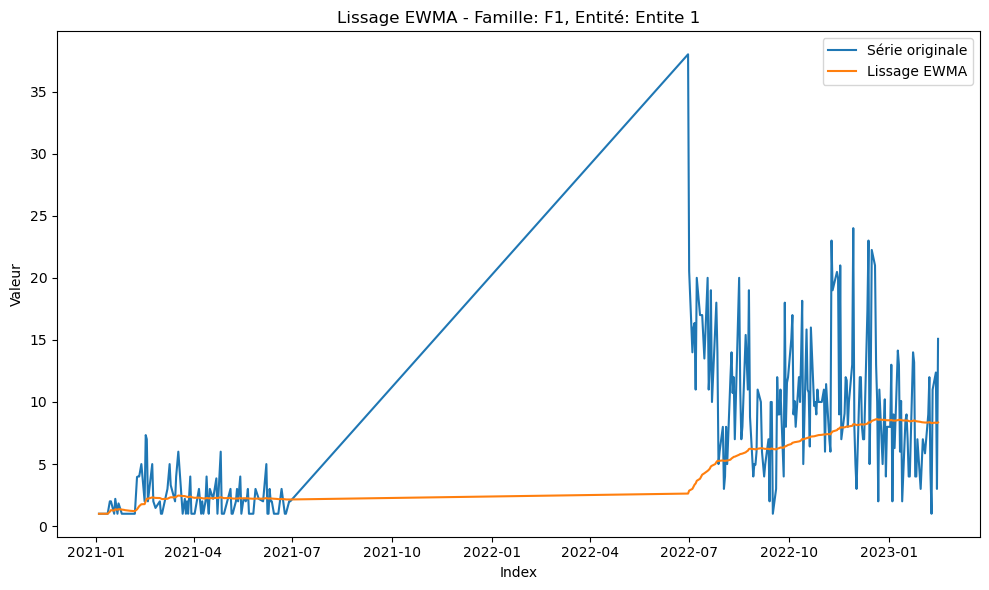

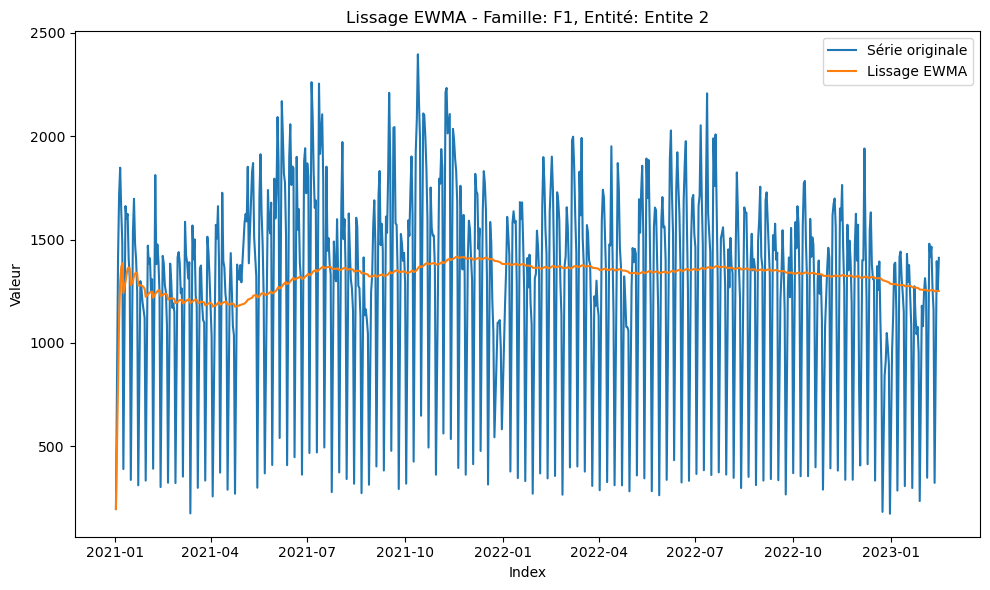

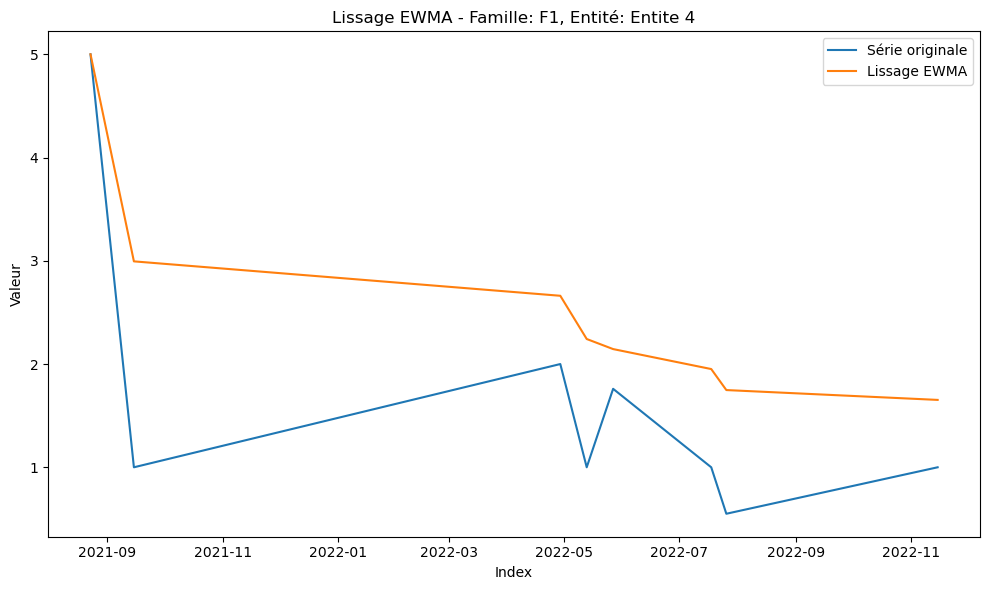

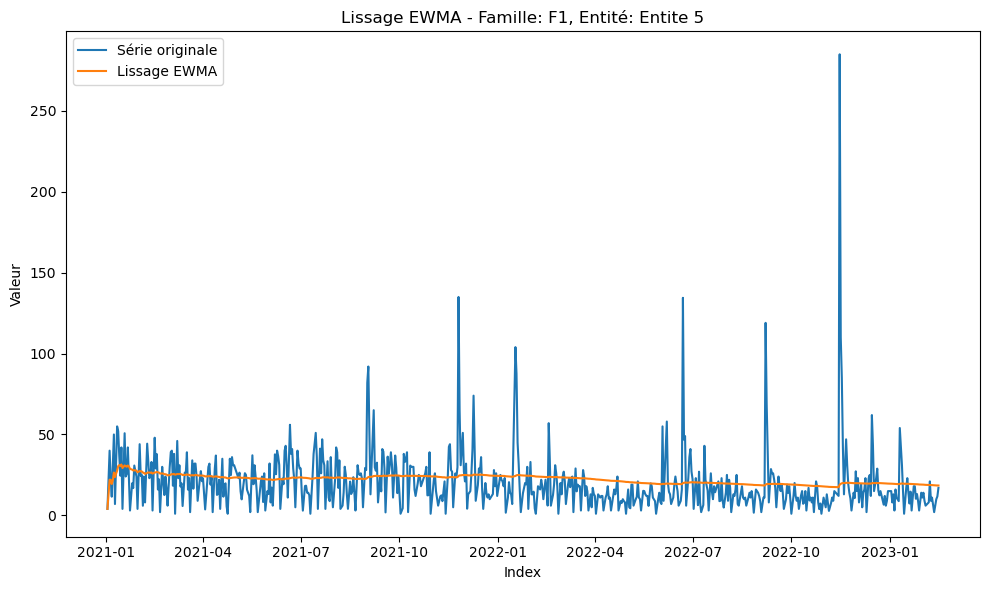

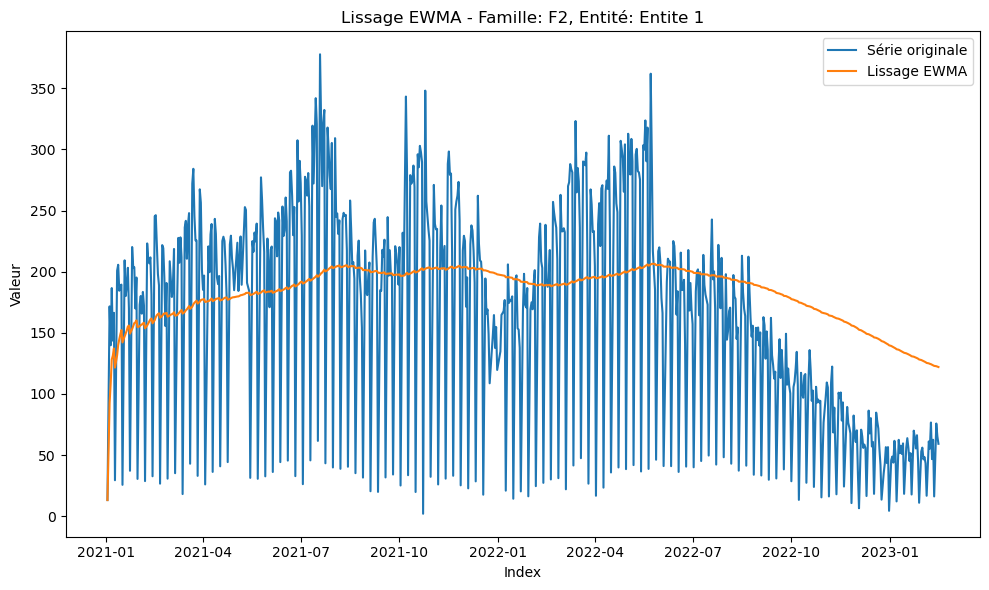

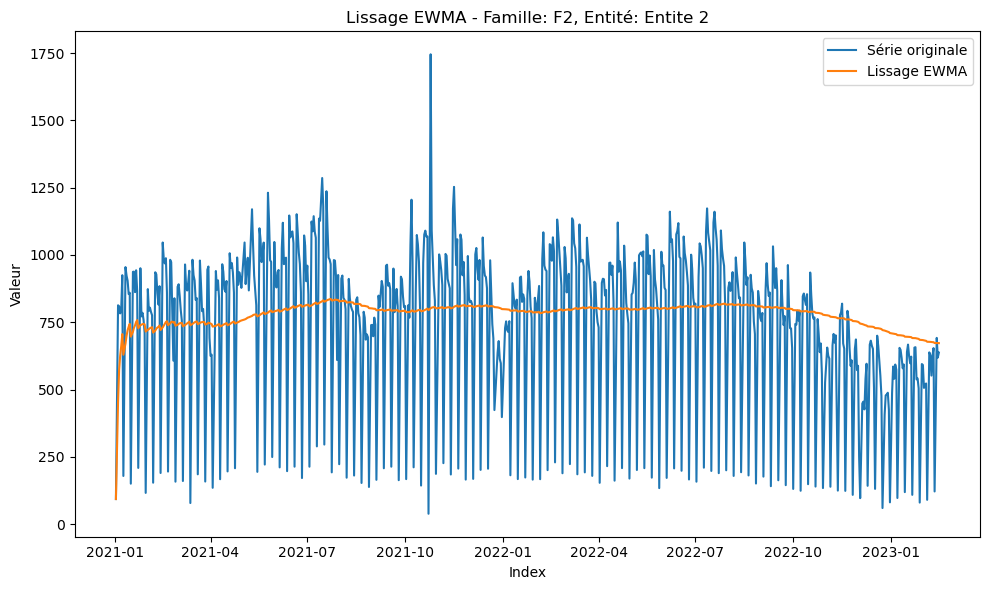

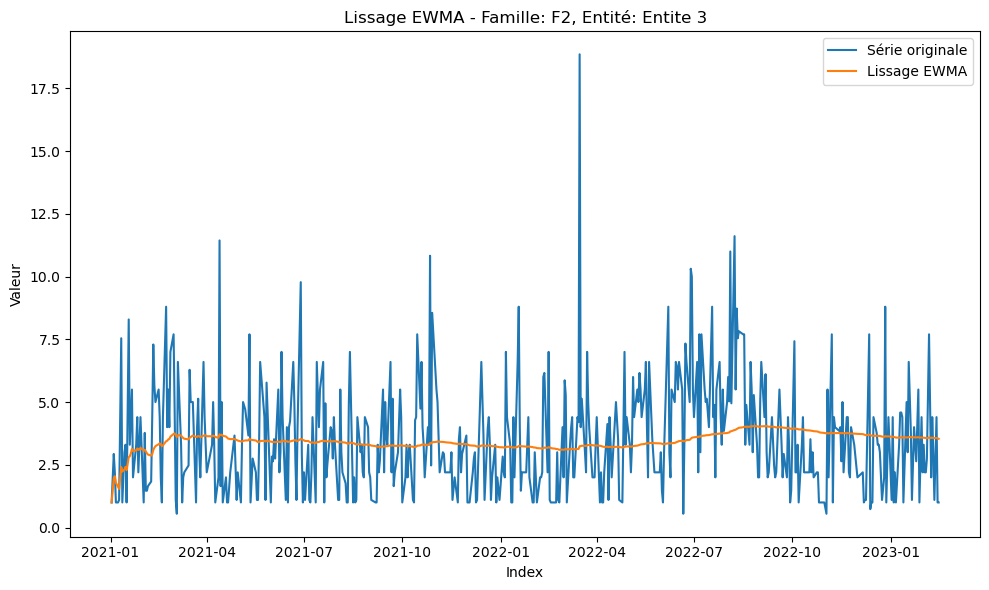

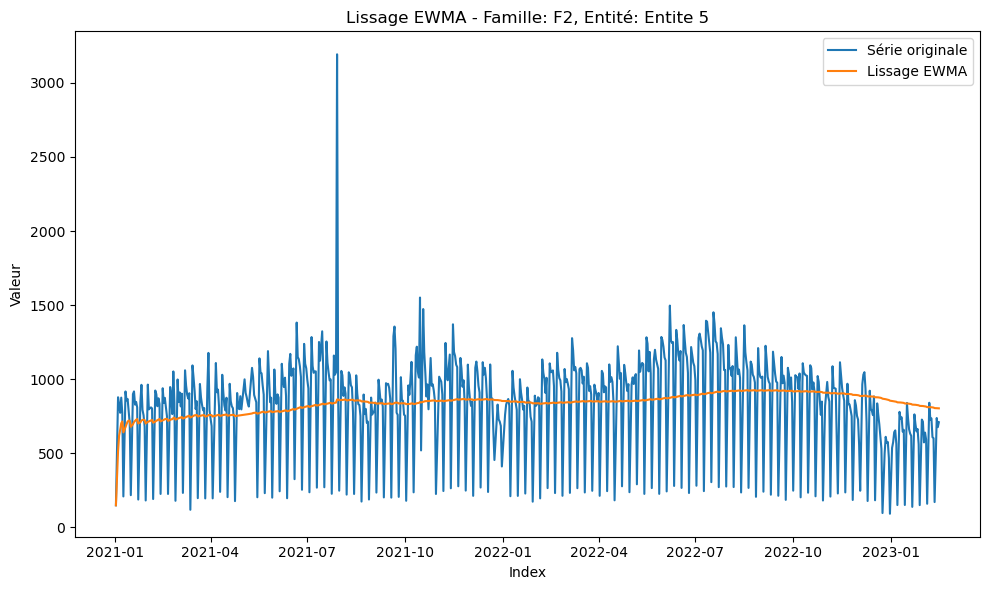

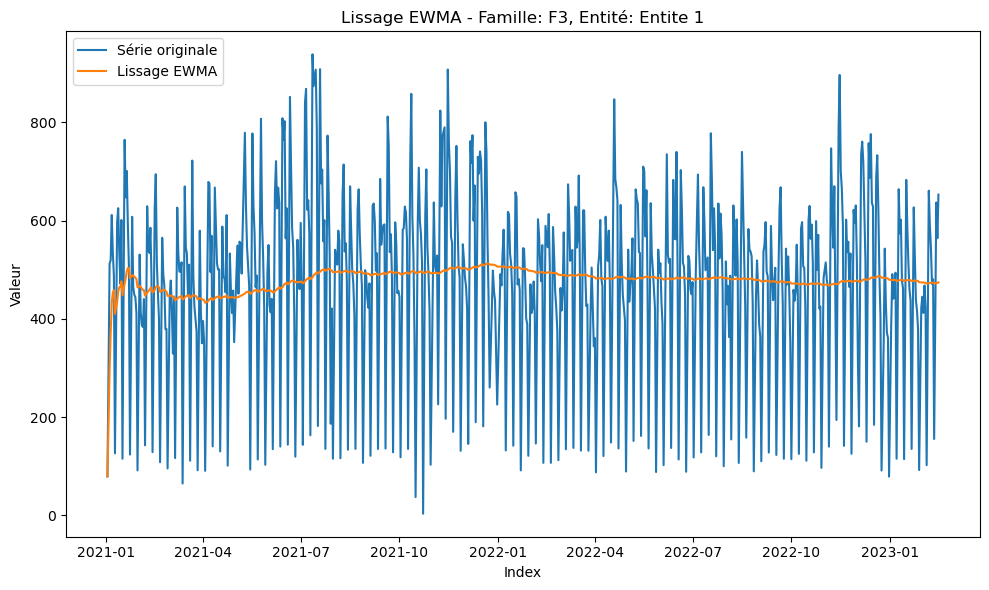

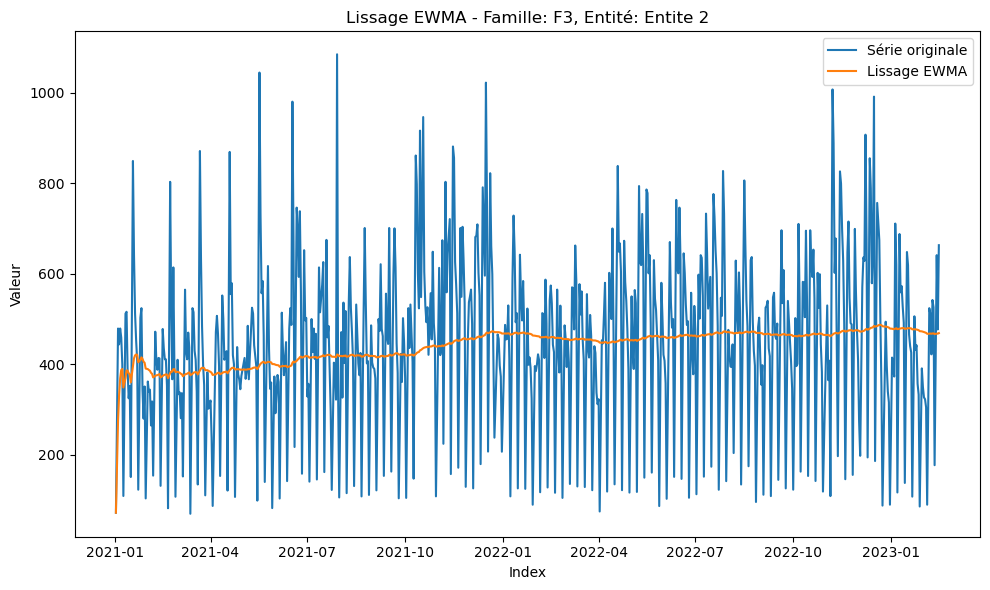

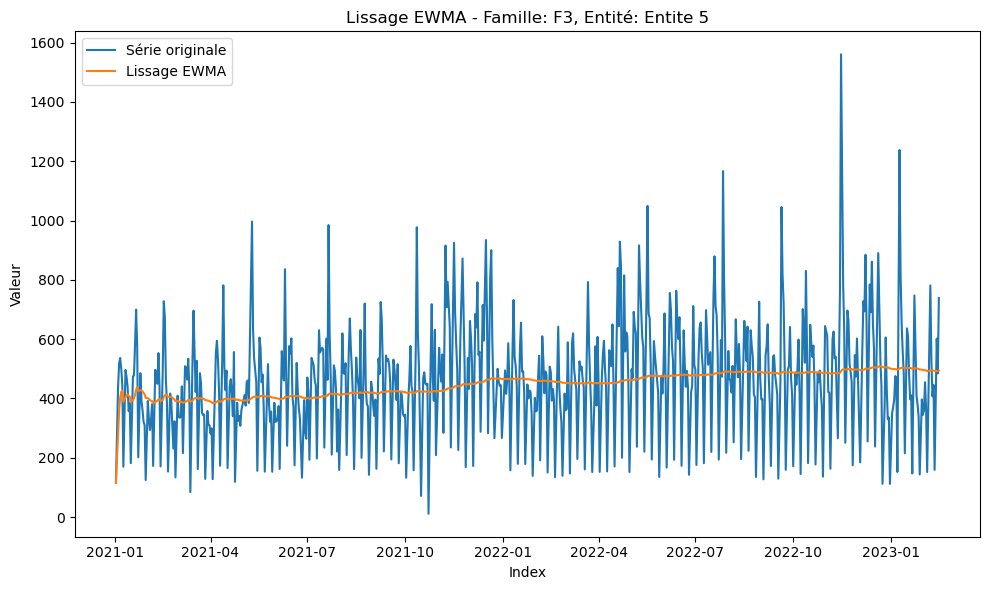

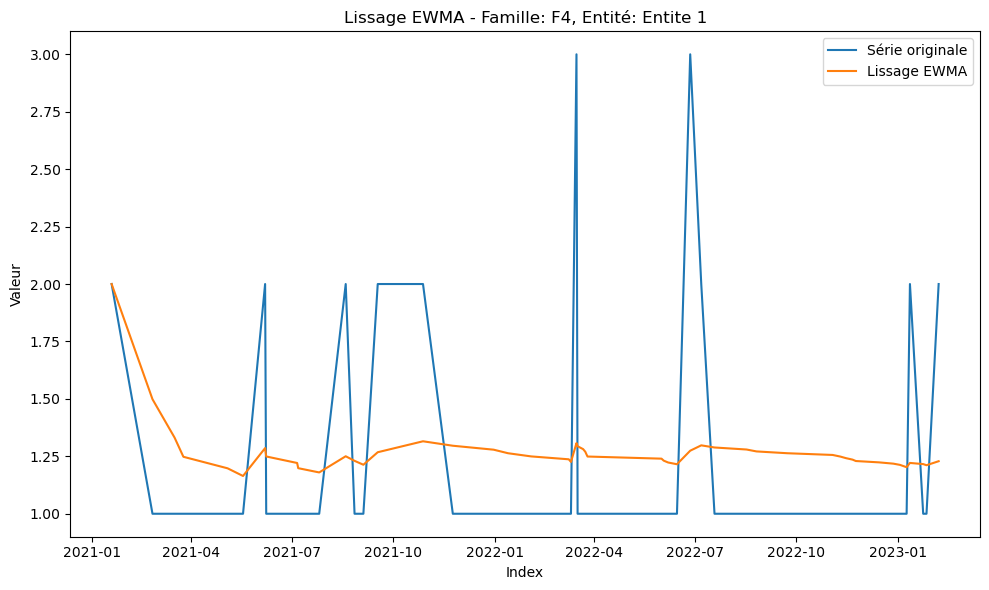

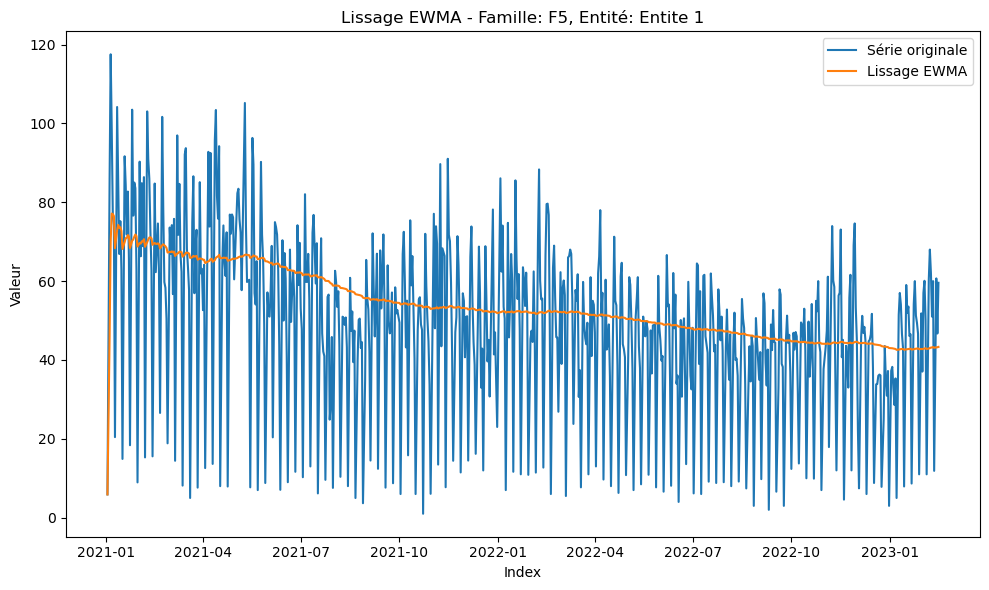

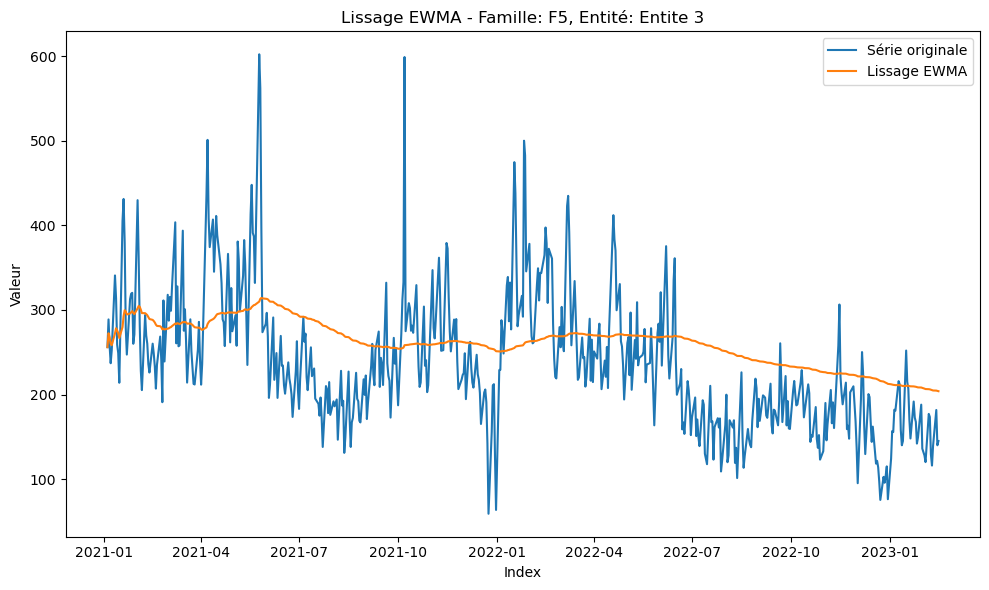

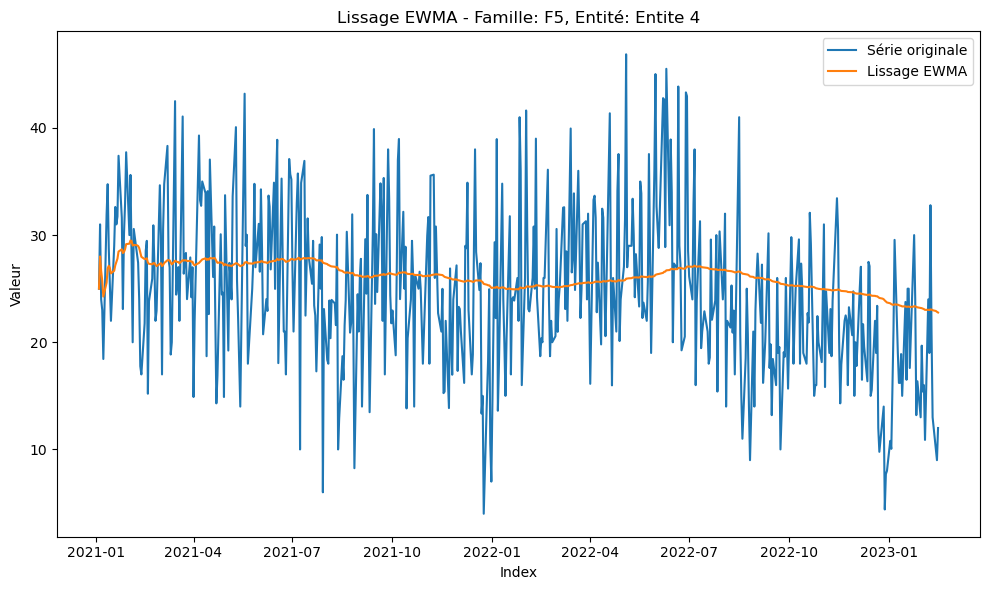

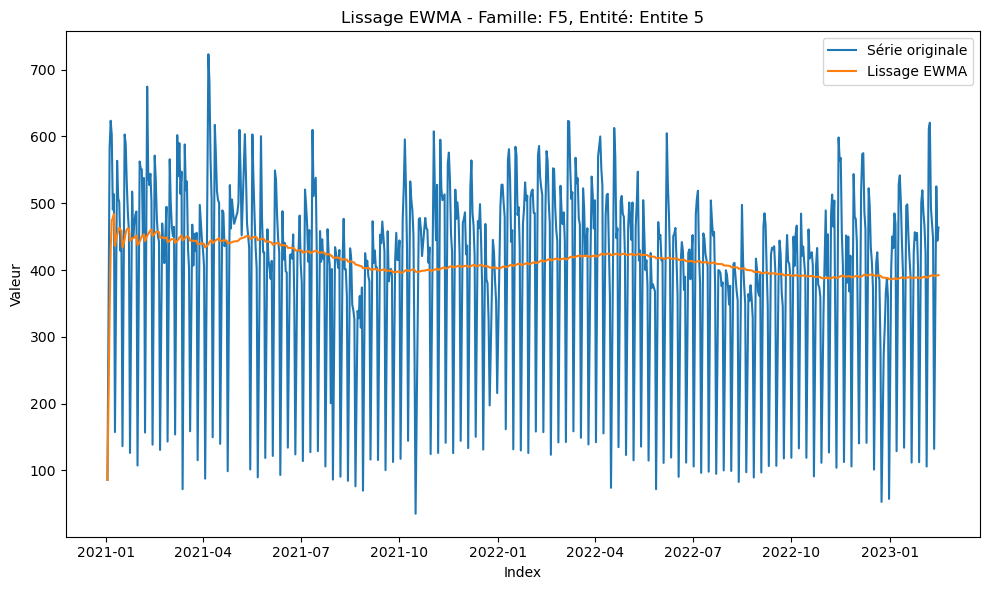

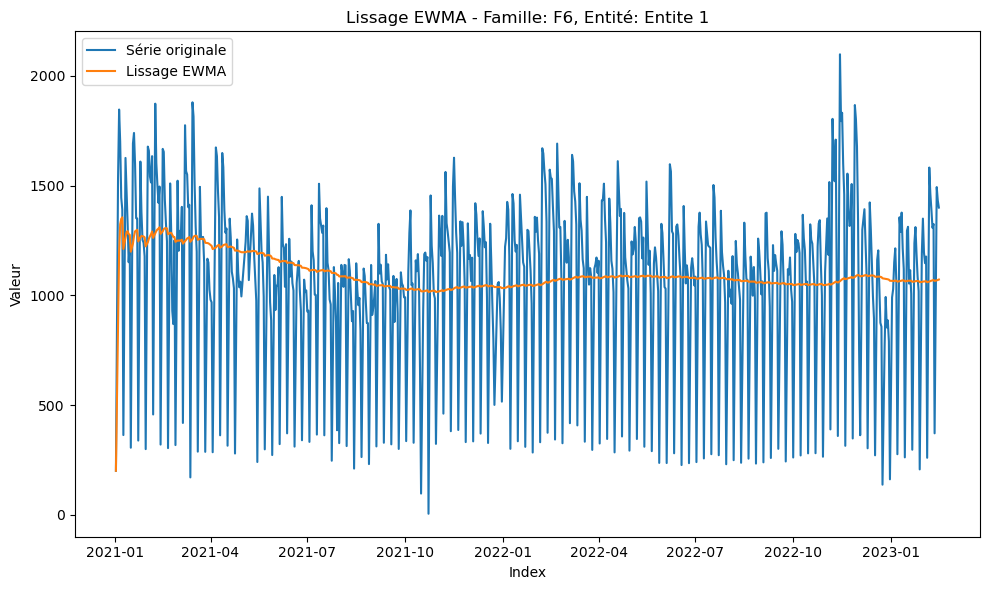

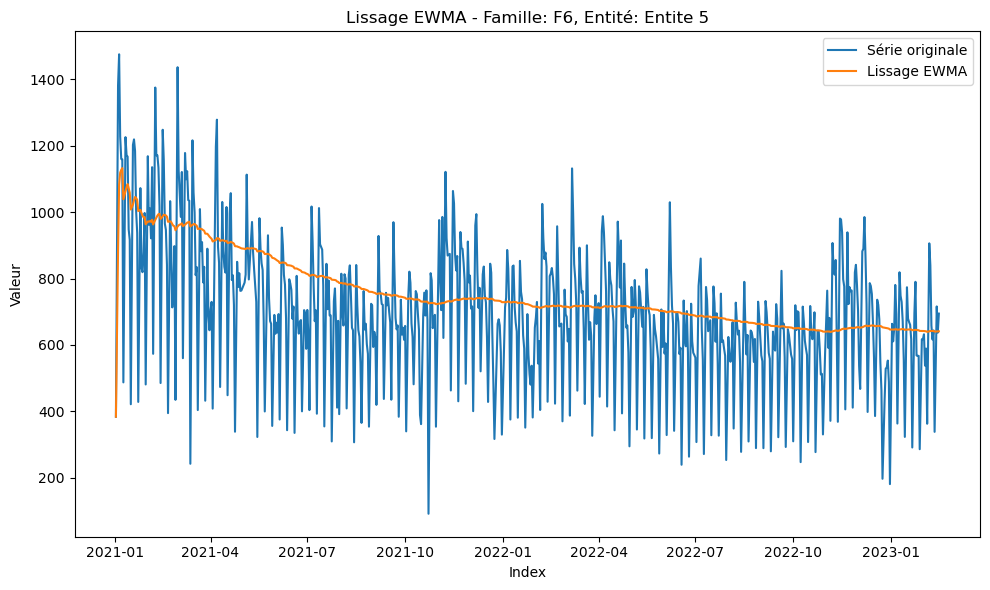

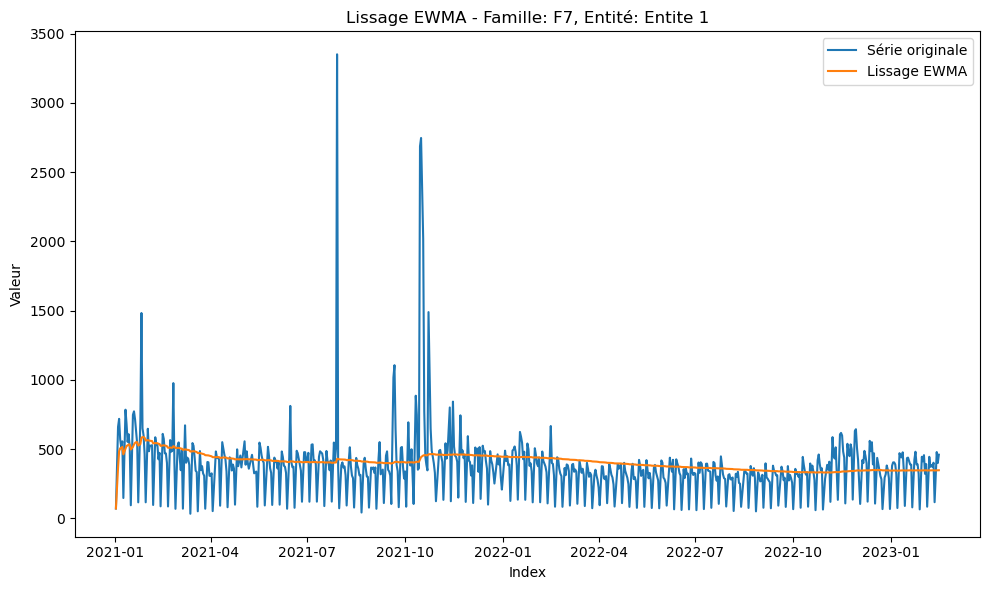

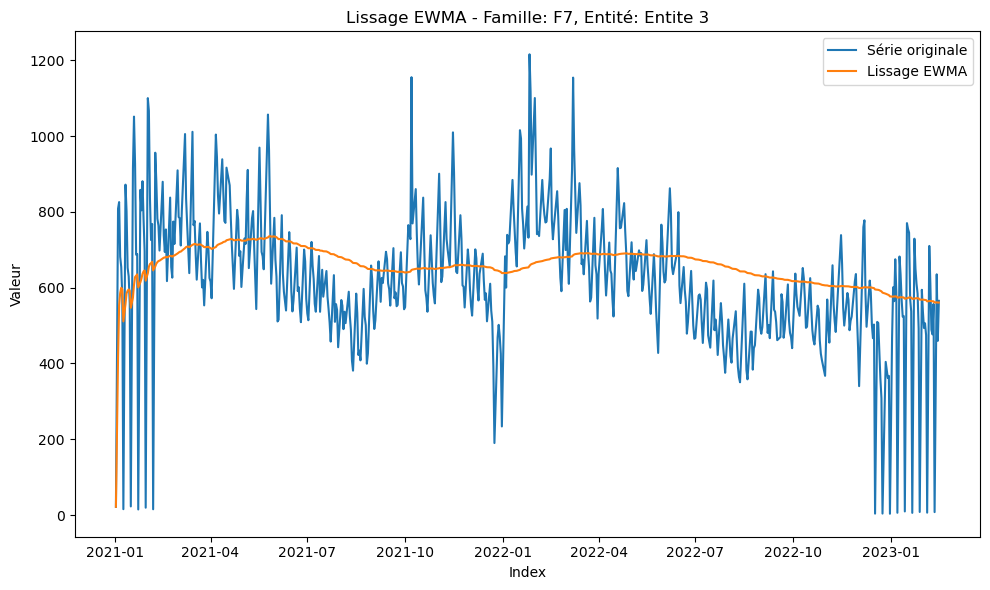

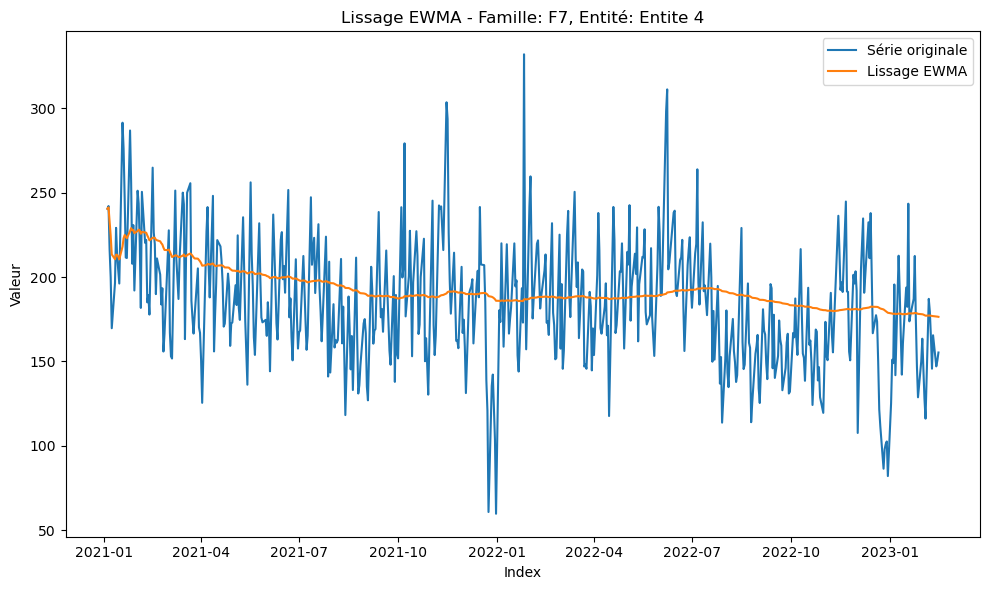

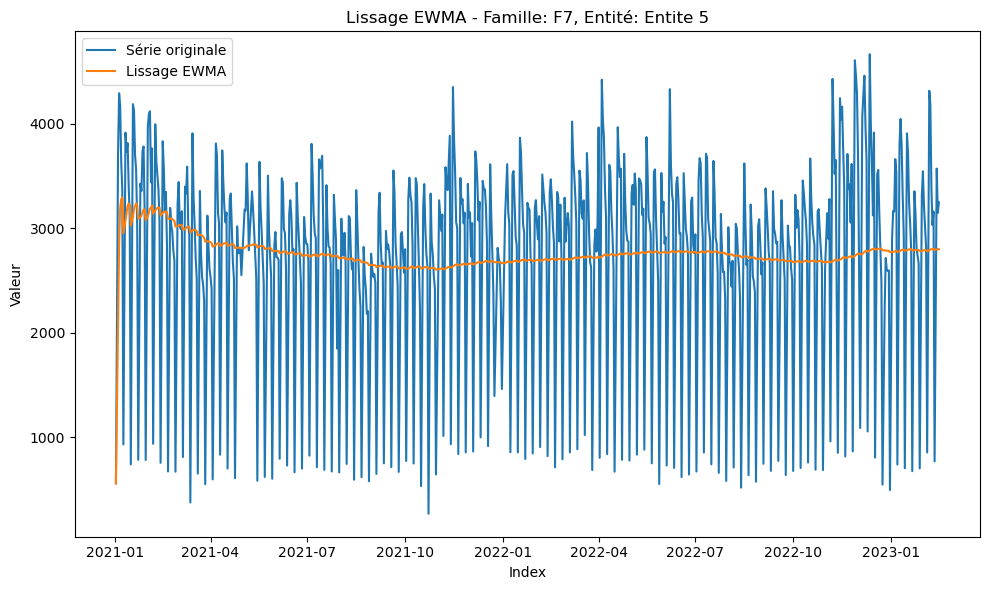

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Parcourir chaque famille_entite et effectuer le lissage de la série temporelle
for famille_entite, data_famille_entite in df_telephone.groupby(['famille', 'entite']):
    # Extraire les données spécifiques à la famille_entite
    serie = data_famille_entite['nombre_entrants_corrige']

    # Lissage de la série temporelle avec EWMA
    lissage_ewma = serie.ewm(span=365).mean()

    # Afficher les graphiques de la série originale et du lissage EWMA
    plt.figure(figsize=(10, 6))
    plt.plot(serie, label='Série originale')
    plt.plot(lissage_ewma, label='Lissage EWMA')
    plt.title(f"Lissage EWMA - Famille: {famille_entite[0]}, Entité: {famille_entite[1]}")
    plt.xlabel("Index")
    plt.ylabel("Valeur")
    plt.legend()
    plt.tight_layout()
    plt.show()
